In [38]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

#import sklearn 

#from numpy import mean
#from numpy import std

#from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor

#from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

#from sklearn.metrics import make_scorer

from matplotlib import pyplot
import seaborn as sns

In [39]:
original = pd.read_csv('../../../Data/Original.csv')
original.shape

(2580, 82)

In [40]:
ames = pd.read_csv('../../../Data/Ames_HousePrice.csv')
ames.shape

(2580, 82)

In [41]:
original.equals(ames)

True

In [42]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [43]:
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [44]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [45]:
#ames.dtypes.unique()

In [46]:
#categorical_features_indices = np.where(ames.dtypes == np.object)[0]
#categorical_features_indices

In [47]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'
          }

In [48]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [49]:
X = ordinal.drop(['SalePrice'], axis=1).values
y = ordinal.SalePrice.values

In [50]:
X.shape

(2580, 79)

In [51]:
dfs = evaluate_model(CatBoostRegressor(), X, y)

Learning rate set to 0.04591
0:	learn: 73247.5799907	total: 61.7ms	remaining: 1m 1s
1:	learn: 71095.6931120	total: 68.5ms	remaining: 34.2s
2:	learn: 68894.2811243	total: 72.8ms	remaining: 24.2s
3:	learn: 66839.0428257	total: 76.5ms	remaining: 19.1s
4:	learn: 64717.4195994	total: 81.7ms	remaining: 16.3s
5:	learn: 62778.6098434	total: 85.8ms	remaining: 14.2s
6:	learn: 61055.9935061	total: 89.9ms	remaining: 12.8s
7:	learn: 59309.1870510	total: 93.5ms	remaining: 11.6s
8:	learn: 57702.6692998	total: 97.2ms	remaining: 10.7s
9:	learn: 56280.5648697	total: 107ms	remaining: 10.6s
10:	learn: 54769.2441992	total: 115ms	remaining: 10.4s
11:	learn: 53333.7424899	total: 120ms	remaining: 9.87s
12:	learn: 51980.7495002	total: 130ms	remaining: 9.85s
13:	learn: 50523.2210983	total: 137ms	remaining: 9.65s
14:	learn: 49293.2952950	total: 144ms	remaining: 9.43s
15:	learn: 48030.0626757	total: 149ms	remaining: 9.18s
16:	learn: 46720.0601649	total: 153ms	remaining: 8.87s
17:	learn: 45636.4268469	total: 158ms

148:	learn: 16796.5532106	total: 1s	remaining: 5.73s
149:	learn: 16762.2466117	total: 1.01s	remaining: 5.72s
150:	learn: 16739.9873005	total: 1.01s	remaining: 5.69s
151:	learn: 16703.3564685	total: 1.02s	remaining: 5.69s
152:	learn: 16675.8722704	total: 1.03s	remaining: 5.73s
153:	learn: 16632.2899545	total: 1.04s	remaining: 5.71s
154:	learn: 16590.3244085	total: 1.04s	remaining: 5.68s
155:	learn: 16540.9564972	total: 1.05s	remaining: 5.68s
156:	learn: 16504.1751084	total: 1.05s	remaining: 5.66s
157:	learn: 16471.0077951	total: 1.06s	remaining: 5.64s
158:	learn: 16422.3544394	total: 1.06s	remaining: 5.63s
159:	learn: 16380.6453271	total: 1.07s	remaining: 5.61s
160:	learn: 16348.6042372	total: 1.07s	remaining: 5.59s
161:	learn: 16322.2416190	total: 1.08s	remaining: 5.57s
162:	learn: 16285.1017159	total: 1.08s	remaining: 5.55s
163:	learn: 16250.2858694	total: 1.08s	remaining: 5.53s
164:	learn: 16206.1402809	total: 1.09s	remaining: 5.51s
165:	learn: 16169.3484926	total: 1.09s	remaining: 5

148:	learn: 16407.8554202	total: 1.01s	remaining: 5.8s
149:	learn: 16375.2037013	total: 1.02s	remaining: 5.79s
150:	learn: 16333.5568191	total: 1.03s	remaining: 5.77s
151:	learn: 16303.7768958	total: 1.04s	remaining: 5.8s
152:	learn: 16276.0979243	total: 1.05s	remaining: 5.8s
153:	learn: 16228.5105368	total: 1.06s	remaining: 5.81s
154:	learn: 16187.3230014	total: 1.06s	remaining: 5.8s
155:	learn: 16167.3633904	total: 1.07s	remaining: 5.78s
156:	learn: 16133.0642015	total: 1.07s	remaining: 5.77s
157:	learn: 16105.5756827	total: 1.09s	remaining: 5.83s
158:	learn: 16078.7265136	total: 1.1s	remaining: 5.83s
159:	learn: 16050.2722484	total: 1.12s	remaining: 5.87s
160:	learn: 16025.3210897	total: 1.13s	remaining: 5.87s
161:	learn: 15997.6842231	total: 1.14s	remaining: 5.88s
162:	learn: 15970.1925721	total: 1.15s	remaining: 5.9s
163:	learn: 15937.1767003	total: 1.15s	remaining: 5.88s
164:	learn: 15909.0418306	total: 1.16s	remaining: 5.88s
165:	learn: 15869.3617428	total: 1.18s	remaining: 5.91

295:	learn: 12906.0150861	total: 1.89s	remaining: 4.5s
296:	learn: 12888.7978497	total: 1.89s	remaining: 4.48s
297:	learn: 12879.9764226	total: 1.9s	remaining: 4.47s
298:	learn: 12862.9282643	total: 1.9s	remaining: 4.46s
299:	learn: 12842.5071007	total: 1.91s	remaining: 4.45s
300:	learn: 12830.1393699	total: 1.91s	remaining: 4.44s
301:	learn: 12813.1807381	total: 1.92s	remaining: 4.44s
302:	learn: 12797.1679098	total: 1.92s	remaining: 4.43s
303:	learn: 12794.4924113	total: 1.93s	remaining: 4.42s
304:	learn: 12781.0493771	total: 1.94s	remaining: 4.42s
305:	learn: 12767.7896485	total: 1.95s	remaining: 4.41s
306:	learn: 12743.9359383	total: 1.95s	remaining: 4.4s
307:	learn: 12717.8227329	total: 1.95s	remaining: 4.38s
308:	learn: 12706.6763019	total: 1.96s	remaining: 4.38s
309:	learn: 12699.7670271	total: 1.96s	remaining: 4.37s
310:	learn: 12696.0196306	total: 1.96s	remaining: 4.35s
311:	learn: 12678.2167871	total: 1.97s	remaining: 4.34s
312:	learn: 12669.3584008	total: 1.98s	remaining: 4.

296:	learn: 12966.9101362	total: 1.99s	remaining: 4.72s
297:	learn: 12945.5914651	total: 2s	remaining: 4.71s
298:	learn: 12942.5314593	total: 2s	remaining: 4.69s
299:	learn: 12940.8295318	total: 2s	remaining: 4.68s
300:	learn: 12935.1150036	total: 2.02s	remaining: 4.69s
301:	learn: 12933.6312605	total: 2.03s	remaining: 4.7s
302:	learn: 12915.8179408	total: 2.04s	remaining: 4.69s
303:	learn: 12892.3574594	total: 2.05s	remaining: 4.69s
304:	learn: 12870.1348658	total: 2.05s	remaining: 4.68s
305:	learn: 12847.7209833	total: 2.06s	remaining: 4.67s
306:	learn: 12830.1111149	total: 2.06s	remaining: 4.66s
307:	learn: 12828.5647290	total: 2.07s	remaining: 4.64s
308:	learn: 12806.6548253	total: 2.07s	remaining: 4.64s
309:	learn: 12800.7683461	total: 2.08s	remaining: 4.63s
310:	learn: 12799.2132338	total: 2.08s	remaining: 4.62s
311:	learn: 12781.4206498	total: 2.1s	remaining: 4.62s
312:	learn: 12757.6150325	total: 2.1s	remaining: 4.61s
313:	learn: 12744.0218831	total: 2.1s	remaining: 4.6s
314:	l

443:	learn: 10442.2194144	total: 2.83s	remaining: 3.54s
444:	learn: 10433.5761632	total: 2.83s	remaining: 3.53s
445:	learn: 10420.7468583	total: 2.84s	remaining: 3.52s
446:	learn: 10410.5246918	total: 2.84s	remaining: 3.52s
447:	learn: 10395.8659468	total: 2.85s	remaining: 3.52s
448:	learn: 10391.4497262	total: 2.86s	remaining: 3.51s
449:	learn: 10388.4841744	total: 2.87s	remaining: 3.51s
450:	learn: 10371.7867920	total: 2.87s	remaining: 3.5s
451:	learn: 10367.0768794	total: 2.88s	remaining: 3.49s
452:	learn: 10352.0770153	total: 2.88s	remaining: 3.48s
453:	learn: 10339.4913032	total: 2.89s	remaining: 3.47s
454:	learn: 10323.5157145	total: 2.9s	remaining: 3.47s
455:	learn: 10307.6584258	total: 2.9s	remaining: 3.46s
456:	learn: 10293.6690921	total: 2.91s	remaining: 3.46s
457:	learn: 10278.5232123	total: 2.92s	remaining: 3.46s
458:	learn: 10262.3547673	total: 2.92s	remaining: 3.45s
459:	learn: 10249.0945640	total: 2.93s	remaining: 3.44s
460:	learn: 10235.0312076	total: 2.94s	remaining: 3

443:	learn: 10627.2813235	total: 2.89s	remaining: 3.62s
444:	learn: 10612.9469054	total: 2.9s	remaining: 3.61s
445:	learn: 10599.7136326	total: 2.9s	remaining: 3.6s
446:	learn: 10597.2983468	total: 2.91s	remaining: 3.6s
447:	learn: 10585.2320429	total: 2.91s	remaining: 3.59s
448:	learn: 10575.5038958	total: 2.93s	remaining: 3.59s
449:	learn: 10559.4679847	total: 2.93s	remaining: 3.58s
450:	learn: 10549.3866285	total: 2.94s	remaining: 3.57s
451:	learn: 10546.0367091	total: 2.94s	remaining: 3.56s
452:	learn: 10538.3986789	total: 2.94s	remaining: 3.55s
453:	learn: 10523.6364506	total: 2.94s	remaining: 3.54s
454:	learn: 10500.7957183	total: 2.95s	remaining: 3.53s
455:	learn: 10488.4978862	total: 2.95s	remaining: 3.52s
456:	learn: 10470.6089724	total: 2.96s	remaining: 3.52s
457:	learn: 10460.8480403	total: 2.96s	remaining: 3.51s
458:	learn: 10458.0498154	total: 2.97s	remaining: 3.51s
459:	learn: 10438.9510103	total: 2.98s	remaining: 3.5s
460:	learn: 10429.1616727	total: 2.99s	remaining: 3.4

591:	learn: 9061.3150397	total: 3.67s	remaining: 2.53s
592:	learn: 9052.4056970	total: 3.67s	remaining: 2.52s
593:	learn: 9040.4484368	total: 3.68s	remaining: 2.51s
594:	learn: 9027.9948685	total: 3.69s	remaining: 2.51s
595:	learn: 9018.1604957	total: 3.69s	remaining: 2.5s
596:	learn: 9005.2569869	total: 3.7s	remaining: 2.5s
597:	learn: 8999.4121742	total: 3.7s	remaining: 2.49s
598:	learn: 8989.4803027	total: 3.71s	remaining: 2.48s
599:	learn: 8978.8800739	total: 3.71s	remaining: 2.47s
600:	learn: 8967.3657359	total: 3.71s	remaining: 2.47s
601:	learn: 8966.9003873	total: 3.72s	remaining: 2.46s
602:	learn: 8952.8520976	total: 3.72s	remaining: 2.45s
603:	learn: 8942.1969188	total: 3.73s	remaining: 2.44s
604:	learn: 8931.3916097	total: 3.73s	remaining: 2.44s
605:	learn: 8922.6774802	total: 3.74s	remaining: 2.43s
606:	learn: 8906.7465189	total: 3.74s	remaining: 2.42s
607:	learn: 8906.2271596	total: 3.75s	remaining: 2.42s
608:	learn: 8892.0272612	total: 3.76s	remaining: 2.41s
609:	learn: 88

592:	learn: 9061.3132986	total: 3.83s	remaining: 2.63s
593:	learn: 9049.9408110	total: 3.84s	remaining: 2.62s
594:	learn: 9043.7036517	total: 3.85s	remaining: 2.62s
595:	learn: 9035.6550578	total: 3.86s	remaining: 2.62s
596:	learn: 9023.9608675	total: 3.87s	remaining: 2.61s
597:	learn: 9014.3168116	total: 3.87s	remaining: 2.6s
598:	learn: 9004.9243759	total: 3.88s	remaining: 2.6s
599:	learn: 8996.4378801	total: 3.88s	remaining: 2.59s
600:	learn: 8986.0323102	total: 3.88s	remaining: 2.58s
601:	learn: 8984.2167678	total: 3.89s	remaining: 2.57s
602:	learn: 8982.9656382	total: 3.9s	remaining: 2.57s
603:	learn: 8974.1899441	total: 3.9s	remaining: 2.56s
604:	learn: 8959.4131300	total: 3.9s	remaining: 2.55s
605:	learn: 8947.7606665	total: 3.91s	remaining: 2.54s
606:	learn: 8946.5268977	total: 3.92s	remaining: 2.54s
607:	learn: 8926.2038333	total: 3.92s	remaining: 2.53s
608:	learn: 8917.7057141	total: 3.93s	remaining: 2.52s
609:	learn: 8901.7549939	total: 3.93s	remaining: 2.51s
610:	learn: 889

741:	learn: 7825.1641822	total: 4.61s	remaining: 1.6s
742:	learn: 7813.0327385	total: 4.61s	remaining: 1.6s
743:	learn: 7806.8102135	total: 4.62s	remaining: 1.59s
744:	learn: 7800.3218394	total: 4.63s	remaining: 1.58s
745:	learn: 7790.6539920	total: 4.63s	remaining: 1.58s
746:	learn: 7783.1612851	total: 4.64s	remaining: 1.57s
747:	learn: 7773.7650777	total: 4.65s	remaining: 1.57s
748:	learn: 7770.6067471	total: 4.66s	remaining: 1.56s
749:	learn: 7762.2109889	total: 4.67s	remaining: 1.56s
750:	learn: 7755.7936413	total: 4.68s	remaining: 1.55s
751:	learn: 7755.4091327	total: 4.69s	remaining: 1.55s
752:	learn: 7742.6729176	total: 4.7s	remaining: 1.54s
753:	learn: 7735.1500391	total: 4.71s	remaining: 1.53s
754:	learn: 7730.4534249	total: 4.71s	remaining: 1.53s
755:	learn: 7719.4059183	total: 4.72s	remaining: 1.52s
756:	learn: 7714.3848888	total: 4.73s	remaining: 1.52s
757:	learn: 7709.0364157	total: 4.74s	remaining: 1.51s
758:	learn: 7707.1978148	total: 4.74s	remaining: 1.51s
759:	learn: 7

742:	learn: 7747.1857907	total: 4.94s	remaining: 1.71s
743:	learn: 7746.7364915	total: 4.94s	remaining: 1.7s
744:	learn: 7744.5157557	total: 4.94s	remaining: 1.69s
745:	learn: 7744.0983662	total: 4.95s	remaining: 1.68s
746:	learn: 7735.1248814	total: 4.95s	remaining: 1.68s
747:	learn: 7725.8141630	total: 4.96s	remaining: 1.67s
748:	learn: 7715.8927245	total: 4.96s	remaining: 1.66s
749:	learn: 7711.2728762	total: 4.97s	remaining: 1.66s
750:	learn: 7697.5606322	total: 4.97s	remaining: 1.65s
751:	learn: 7688.6703727	total: 4.98s	remaining: 1.64s
752:	learn: 7680.3098686	total: 4.99s	remaining: 1.64s
753:	learn: 7672.8063794	total: 4.99s	remaining: 1.63s
754:	learn: 7659.3861106	total: 5s	remaining: 1.62s
755:	learn: 7655.2616942	total: 5.01s	remaining: 1.61s
756:	learn: 7644.1005581	total: 5.01s	remaining: 1.61s
757:	learn: 7634.3424053	total: 5.01s	remaining: 1.6s
758:	learn: 7622.7247753	total: 5.02s	remaining: 1.59s
759:	learn: 7613.4512283	total: 5.02s	remaining: 1.58s
760:	learn: 760

891:	learn: 6860.4026572	total: 5.59s	remaining: 677ms
892:	learn: 6855.6487374	total: 5.6s	remaining: 671ms
893:	learn: 6844.1374477	total: 5.6s	remaining: 664ms
894:	learn: 6841.0666800	total: 5.63s	remaining: 660ms
895:	learn: 6837.5873185	total: 5.63s	remaining: 654ms
896:	learn: 6831.8922858	total: 5.63s	remaining: 647ms
897:	learn: 6825.5303275	total: 5.64s	remaining: 640ms
898:	learn: 6822.5118377	total: 5.65s	remaining: 635ms
899:	learn: 6814.2032033	total: 5.65s	remaining: 628ms
900:	learn: 6808.1915401	total: 5.66s	remaining: 622ms
901:	learn: 6803.3885522	total: 5.66s	remaining: 615ms
902:	learn: 6797.2286095	total: 5.67s	remaining: 609ms
903:	learn: 6795.9308577	total: 5.67s	remaining: 602ms
904:	learn: 6789.7561512	total: 5.68s	remaining: 596ms
905:	learn: 6786.5830600	total: 5.68s	remaining: 589ms
906:	learn: 6784.8286087	total: 5.69s	remaining: 584ms
907:	learn: 6775.7706957	total: 5.7s	remaining: 578ms
908:	learn: 6771.2444898	total: 5.7s	remaining: 571ms
909:	learn: 67

893:	learn: 6804.2640576	total: 5.76s	remaining: 683ms
894:	learn: 6799.4960947	total: 5.77s	remaining: 677ms
895:	learn: 6788.2180676	total: 5.78s	remaining: 670ms
896:	learn: 6785.5306874	total: 5.79s	remaining: 665ms
897:	learn: 6780.6532622	total: 5.79s	remaining: 658ms
898:	learn: 6773.6922833	total: 5.8s	remaining: 651ms
899:	learn: 6771.7187274	total: 5.8s	remaining: 645ms
900:	learn: 6764.9957437	total: 5.81s	remaining: 638ms
901:	learn: 6759.8796213	total: 5.82s	remaining: 632ms
902:	learn: 6753.7053182	total: 5.83s	remaining: 626ms
903:	learn: 6744.5941993	total: 5.84s	remaining: 620ms
904:	learn: 6741.6331085	total: 5.84s	remaining: 613ms
905:	learn: 6735.9895761	total: 5.85s	remaining: 607ms
906:	learn: 6724.0469026	total: 5.86s	remaining: 601ms
907:	learn: 6722.1726483	total: 5.86s	remaining: 594ms
908:	learn: 6714.6596664	total: 5.87s	remaining: 587ms
909:	learn: 6707.9040193	total: 5.87s	remaining: 581ms
910:	learn: 6700.8200463	total: 5.88s	remaining: 575ms
911:	learn: 

41:	learn: 28062.9717985	total: 276ms	remaining: 6.29s
42:	learn: 27722.3860945	total: 280ms	remaining: 6.22s
43:	learn: 27324.6055292	total: 285ms	remaining: 6.19s
44:	learn: 27021.7423483	total: 288ms	remaining: 6.12s
45:	learn: 26679.4243483	total: 297ms	remaining: 6.15s
46:	learn: 26337.3194483	total: 302ms	remaining: 6.12s
47:	learn: 26070.4022808	total: 306ms	remaining: 6.08s
48:	learn: 25730.3788401	total: 310ms	remaining: 6.02s
49:	learn: 25494.2152646	total: 316ms	remaining: 6s
50:	learn: 25189.9109278	total: 320ms	remaining: 5.96s
51:	learn: 24918.4848647	total: 330ms	remaining: 6.02s
52:	learn: 24659.3500178	total: 337ms	remaining: 6.03s
53:	learn: 24442.0557079	total: 342ms	remaining: 5.99s
54:	learn: 24184.1221596	total: 347ms	remaining: 5.97s
55:	learn: 23941.9600035	total: 354ms	remaining: 5.97s
56:	learn: 23703.7732809	total: 358ms	remaining: 5.93s
57:	learn: 23492.2860681	total: 363ms	remaining: 5.9s
58:	learn: 23280.1366459	total: 367ms	remaining: 5.86s
59:	learn: 230

41:	learn: 28868.0599574	total: 283ms	remaining: 6.45s
42:	learn: 28517.1238932	total: 287ms	remaining: 6.38s
43:	learn: 28124.1004450	total: 295ms	remaining: 6.41s
44:	learn: 27771.8983980	total: 299ms	remaining: 6.35s
45:	learn: 27416.2353520	total: 304ms	remaining: 6.31s
46:	learn: 27104.2361112	total: 311ms	remaining: 6.3s
47:	learn: 26846.4205346	total: 315ms	remaining: 6.25s
48:	learn: 26618.9502474	total: 319ms	remaining: 6.18s
49:	learn: 26354.0895423	total: 327ms	remaining: 6.21s
50:	learn: 26070.5302642	total: 339ms	remaining: 6.3s
51:	learn: 25814.1505662	total: 343ms	remaining: 6.25s
52:	learn: 25529.2760703	total: 347ms	remaining: 6.19s
53:	learn: 25301.0293991	total: 351ms	remaining: 6.14s
54:	learn: 25037.9197082	total: 355ms	remaining: 6.1s
55:	learn: 24783.8053491	total: 365ms	remaining: 6.16s
56:	learn: 24567.4166807	total: 369ms	remaining: 6.11s
57:	learn: 24377.2752846	total: 374ms	remaining: 6.07s
58:	learn: 24163.4680022	total: 378ms	remaining: 6.03s
59:	learn: 23

189:	learn: 15097.4824314	total: 990ms	remaining: 4.22s
190:	learn: 15050.6905164	total: 993ms	remaining: 4.21s
191:	learn: 15019.8532254	total: 999ms	remaining: 4.21s
192:	learn: 14991.3153366	total: 1s	remaining: 4.19s
193:	learn: 14956.2458551	total: 1.01s	remaining: 4.19s
194:	learn: 14940.0924512	total: 1.01s	remaining: 4.17s
195:	learn: 14916.3121601	total: 1.02s	remaining: 4.17s
196:	learn: 14888.5741098	total: 1.02s	remaining: 4.18s
197:	learn: 14842.5635455	total: 1.03s	remaining: 4.16s
198:	learn: 14818.5023130	total: 1.03s	remaining: 4.15s
199:	learn: 14802.1197928	total: 1.03s	remaining: 4.14s
200:	learn: 14774.7953584	total: 1.04s	remaining: 4.13s
201:	learn: 14746.5543246	total: 1.04s	remaining: 4.12s
202:	learn: 14707.2845232	total: 1.05s	remaining: 4.11s
203:	learn: 14686.3077228	total: 1.05s	remaining: 4.11s
204:	learn: 14646.7109802	total: 1.06s	remaining: 4.11s
205:	learn: 14630.5793197	total: 1.07s	remaining: 4.11s
206:	learn: 14615.5921779	total: 1.07s	remaining: 4

189:	learn: 15252.0565517	total: 1.09s	remaining: 4.65s
190:	learn: 15220.1206526	total: 1.09s	remaining: 4.64s
191:	learn: 15198.7498639	total: 1.1s	remaining: 4.62s
192:	learn: 15174.0931140	total: 1.1s	remaining: 4.61s
193:	learn: 15155.4802408	total: 1.11s	remaining: 4.61s
194:	learn: 15115.9626589	total: 1.11s	remaining: 4.6s
195:	learn: 15099.3574972	total: 1.12s	remaining: 4.59s
196:	learn: 15059.8057281	total: 1.12s	remaining: 4.58s
197:	learn: 15028.8316510	total: 1.13s	remaining: 4.57s
198:	learn: 14989.5420511	total: 1.13s	remaining: 4.56s
199:	learn: 14975.7701156	total: 1.14s	remaining: 4.55s
200:	learn: 14950.6340443	total: 1.14s	remaining: 4.53s
201:	learn: 14923.4861974	total: 1.15s	remaining: 4.53s
202:	learn: 14898.8188474	total: 1.16s	remaining: 4.54s
203:	learn: 14881.0493999	total: 1.16s	remaining: 4.53s
204:	learn: 14864.5551791	total: 1.17s	remaining: 4.52s
205:	learn: 14852.0371910	total: 1.17s	remaining: 4.51s
206:	learn: 14823.4126105	total: 1.17s	remaining: 4

337:	learn: 11910.1134069	total: 1.76s	remaining: 3.45s
338:	learn: 11896.8975726	total: 1.77s	remaining: 3.44s
339:	learn: 11875.4161858	total: 1.77s	remaining: 3.44s
340:	learn: 11858.8815106	total: 1.78s	remaining: 3.43s
341:	learn: 11840.7003782	total: 1.78s	remaining: 3.43s
342:	learn: 11825.7183240	total: 1.78s	remaining: 3.42s
343:	learn: 11821.7821029	total: 1.79s	remaining: 3.41s
344:	learn: 11806.5758101	total: 1.79s	remaining: 3.4s
345:	learn: 11786.9235512	total: 1.8s	remaining: 3.4s
346:	learn: 11770.7312814	total: 1.8s	remaining: 3.4s
347:	learn: 11766.7805611	total: 1.81s	remaining: 3.39s
348:	learn: 11748.0135464	total: 1.81s	remaining: 3.38s
349:	learn: 11734.2969253	total: 1.82s	remaining: 3.38s
350:	learn: 11720.6082331	total: 1.82s	remaining: 3.37s
351:	learn: 11703.1627610	total: 1.83s	remaining: 3.37s
352:	learn: 11686.9935161	total: 1.83s	remaining: 3.36s
353:	learn: 11655.6490040	total: 1.84s	remaining: 3.35s
354:	learn: 11654.4061861	total: 1.84s	remaining: 3.3

336:	learn: 12052.7101026	total: 1.89s	remaining: 3.72s
337:	learn: 12027.2391529	total: 1.89s	remaining: 3.71s
338:	learn: 12007.3059074	total: 1.9s	remaining: 3.7s
339:	learn: 11988.3207731	total: 1.9s	remaining: 3.69s
340:	learn: 11979.8252267	total: 1.91s	remaining: 3.68s
341:	learn: 11954.1047766	total: 1.91s	remaining: 3.68s
342:	learn: 11945.8957918	total: 1.92s	remaining: 3.67s
343:	learn: 11926.4357340	total: 1.92s	remaining: 3.66s
344:	learn: 11913.9322201	total: 1.93s	remaining: 3.66s
345:	learn: 11909.3448247	total: 1.93s	remaining: 3.65s
346:	learn: 11905.7566688	total: 1.93s	remaining: 3.64s
347:	learn: 11894.6450874	total: 1.94s	remaining: 3.63s
348:	learn: 11877.3447901	total: 1.94s	remaining: 3.63s
349:	learn: 11858.9699432	total: 1.95s	remaining: 3.62s
350:	learn: 11835.9529115	total: 1.95s	remaining: 3.61s
351:	learn: 11811.7362382	total: 1.96s	remaining: 3.6s
352:	learn: 11784.0649300	total: 1.96s	remaining: 3.6s
353:	learn: 11772.1099407	total: 1.97s	remaining: 3.5

337:	learn: 12184.8159571	total: 1.95s	remaining: 3.82s
338:	learn: 12163.2369432	total: 1.95s	remaining: 3.81s
339:	learn: 12157.0697642	total: 1.96s	remaining: 3.8s
340:	learn: 12135.7357899	total: 1.96s	remaining: 3.79s
341:	learn: 12102.4168428	total: 1.97s	remaining: 3.78s
342:	learn: 12089.0365663	total: 1.97s	remaining: 3.78s
343:	learn: 12069.4649607	total: 1.98s	remaining: 3.77s
344:	learn: 12056.0821274	total: 1.98s	remaining: 3.76s
345:	learn: 12040.6563641	total: 1.99s	remaining: 3.75s
346:	learn: 12016.2798713	total: 1.99s	remaining: 3.75s
347:	learn: 12002.6229677	total: 1.99s	remaining: 3.74s
348:	learn: 11988.6179448	total: 2s	remaining: 3.74s
349:	learn: 11983.9655169	total: 2.01s	remaining: 3.73s
350:	learn: 11960.4958388	total: 2.02s	remaining: 3.73s
351:	learn: 11937.9166883	total: 2.02s	remaining: 3.73s
352:	learn: 11912.3704832	total: 2.03s	remaining: 3.72s
353:	learn: 11887.2270741	total: 2.03s	remaining: 3.71s
354:	learn: 11871.0758451	total: 2.04s	remaining: 3.

485:	learn: 9806.3491550	total: 2.54s	remaining: 2.69s
486:	learn: 9790.6494731	total: 2.54s	remaining: 2.68s
487:	learn: 9786.8932877	total: 2.55s	remaining: 2.67s
488:	learn: 9779.6373819	total: 2.55s	remaining: 2.67s
489:	learn: 9770.5764160	total: 2.56s	remaining: 2.66s
490:	learn: 9754.2445023	total: 2.56s	remaining: 2.65s
491:	learn: 9745.0415612	total: 2.56s	remaining: 2.65s
492:	learn: 9734.3840823	total: 2.57s	remaining: 2.64s
493:	learn: 9717.7273244	total: 2.58s	remaining: 2.64s
494:	learn: 9716.2976253	total: 2.58s	remaining: 2.63s
495:	learn: 9705.9795495	total: 2.58s	remaining: 2.63s
496:	learn: 9692.1890696	total: 2.59s	remaining: 2.62s
497:	learn: 9679.2476059	total: 2.6s	remaining: 2.62s
498:	learn: 9668.0611299	total: 2.6s	remaining: 2.61s
499:	learn: 9662.5299655	total: 2.6s	remaining: 2.6s
500:	learn: 9651.3823303	total: 2.61s	remaining: 2.6s
501:	learn: 9636.1119598	total: 2.61s	remaining: 2.59s
502:	learn: 9626.2987879	total: 2.62s	remaining: 2.58s
503:	learn: 962

484:	learn: 10042.6724201	total: 2.69s	remaining: 2.85s
485:	learn: 10031.5259692	total: 2.69s	remaining: 2.85s
486:	learn: 10015.7416287	total: 2.7s	remaining: 2.84s
487:	learn: 10001.3989302	total: 2.7s	remaining: 2.84s
488:	learn: 9984.6933912	total: 2.71s	remaining: 2.83s
489:	learn: 9975.1687135	total: 2.71s	remaining: 2.82s
490:	learn: 9966.3800031	total: 2.72s	remaining: 2.82s
491:	learn: 9953.2157851	total: 2.72s	remaining: 2.81s
492:	learn: 9941.0035854	total: 2.73s	remaining: 2.81s
493:	learn: 9936.9172860	total: 2.74s	remaining: 2.81s
494:	learn: 9924.4892602	total: 2.75s	remaining: 2.8s
495:	learn: 9920.6095880	total: 2.75s	remaining: 2.8s
496:	learn: 9910.8255812	total: 2.76s	remaining: 2.79s
497:	learn: 9897.7584290	total: 2.76s	remaining: 2.78s
498:	learn: 9893.3981029	total: 2.77s	remaining: 2.78s
499:	learn: 9882.9259467	total: 2.77s	remaining: 2.77s
500:	learn: 9870.5348120	total: 2.78s	remaining: 2.77s
501:	learn: 9858.6636085	total: 2.79s	remaining: 2.77s
502:	learn

484:	learn: 10100.4299128	total: 2.77s	remaining: 2.94s
485:	learn: 10095.6590318	total: 2.77s	remaining: 2.93s
486:	learn: 10089.6031877	total: 2.78s	remaining: 2.92s
487:	learn: 10076.5927866	total: 2.78s	remaining: 2.92s
488:	learn: 10069.4564947	total: 2.79s	remaining: 2.92s
489:	learn: 10060.4265948	total: 2.79s	remaining: 2.91s
490:	learn: 10044.2867662	total: 2.8s	remaining: 2.9s
491:	learn: 10042.6499142	total: 2.81s	remaining: 2.9s
492:	learn: 10035.4535439	total: 2.82s	remaining: 2.9s
493:	learn: 10032.7695690	total: 2.82s	remaining: 2.89s
494:	learn: 10023.7635087	total: 2.83s	remaining: 2.88s
495:	learn: 10011.5154841	total: 2.84s	remaining: 2.88s
496:	learn: 9996.4425698	total: 2.84s	remaining: 2.88s
497:	learn: 9977.8580673	total: 2.85s	remaining: 2.87s
498:	learn: 9971.0572769	total: 2.86s	remaining: 2.87s
499:	learn: 9968.8335446	total: 2.86s	remaining: 2.86s
500:	learn: 9957.7723144	total: 2.87s	remaining: 2.86s
501:	learn: 9947.5445815	total: 2.88s	remaining: 2.86s
50

635:	learn: 8348.3762497	total: 3.33s	remaining: 1.91s
636:	learn: 8340.1783136	total: 3.34s	remaining: 1.9s
637:	learn: 8334.9857259	total: 3.34s	remaining: 1.9s
638:	learn: 8322.4560944	total: 3.35s	remaining: 1.89s
639:	learn: 8316.9060775	total: 3.35s	remaining: 1.89s
640:	learn: 8305.8590690	total: 3.36s	remaining: 1.88s
641:	learn: 8299.7312655	total: 3.37s	remaining: 1.88s
642:	learn: 8292.5421786	total: 3.37s	remaining: 1.87s
643:	learn: 8278.0446912	total: 3.38s	remaining: 1.86s
644:	learn: 8262.8365665	total: 3.38s	remaining: 1.86s
645:	learn: 8252.7555282	total: 3.39s	remaining: 1.86s
646:	learn: 8251.9117668	total: 3.39s	remaining: 1.85s
647:	learn: 8244.0039978	total: 3.4s	remaining: 1.85s
648:	learn: 8235.2294580	total: 3.4s	remaining: 1.84s
649:	learn: 8225.3606488	total: 3.41s	remaining: 1.84s
650:	learn: 8212.6061676	total: 3.42s	remaining: 1.83s
651:	learn: 8202.2689980	total: 3.42s	remaining: 1.83s
652:	learn: 8196.9464898	total: 3.43s	remaining: 1.82s
653:	learn: 81

634:	learn: 8271.1066344	total: 3.54s	remaining: 2.03s
635:	learn: 8264.9450159	total: 3.54s	remaining: 2.03s
636:	learn: 8257.7572392	total: 3.55s	remaining: 2.02s
637:	learn: 8248.5932031	total: 3.56s	remaining: 2.02s
638:	learn: 8244.4957899	total: 3.56s	remaining: 2.01s
639:	learn: 8236.2089272	total: 3.57s	remaining: 2.01s
640:	learn: 8229.6678145	total: 3.57s	remaining: 2s
641:	learn: 8219.5697019	total: 3.58s	remaining: 2s
642:	learn: 8209.2616265	total: 3.58s	remaining: 1.99s
643:	learn: 8197.2532875	total: 3.59s	remaining: 1.98s
644:	learn: 8185.0151887	total: 3.6s	remaining: 1.98s
645:	learn: 8177.8673499	total: 3.6s	remaining: 1.98s
646:	learn: 8166.8447099	total: 3.61s	remaining: 1.97s
647:	learn: 8155.9940530	total: 3.62s	remaining: 1.97s
648:	learn: 8145.5375015	total: 3.62s	remaining: 1.96s
649:	learn: 8138.8049702	total: 3.63s	remaining: 1.95s
650:	learn: 8127.6091966	total: 3.63s	remaining: 1.95s
651:	learn: 8116.8438572	total: 3.64s	remaining: 1.94s
652:	learn: 8103.1

634:	learn: 8733.9971313	total: 3.67s	remaining: 2.11s
635:	learn: 8718.1053162	total: 3.68s	remaining: 2.1s
636:	learn: 8710.4577765	total: 3.68s	remaining: 2.1s
637:	learn: 8702.4948930	total: 3.69s	remaining: 2.09s
638:	learn: 8701.9862344	total: 3.69s	remaining: 2.08s
639:	learn: 8686.2398369	total: 3.69s	remaining: 2.08s
640:	learn: 8678.5069020	total: 3.7s	remaining: 2.07s
641:	learn: 8669.4788597	total: 3.71s	remaining: 2.07s
642:	learn: 8661.1455606	total: 3.71s	remaining: 2.06s
643:	learn: 8656.7546768	total: 3.72s	remaining: 2.05s
644:	learn: 8652.2751754	total: 3.73s	remaining: 2.05s
645:	learn: 8636.6594280	total: 3.73s	remaining: 2.04s
646:	learn: 8621.4012920	total: 3.74s	remaining: 2.04s
647:	learn: 8611.3491661	total: 3.74s	remaining: 2.03s
648:	learn: 8597.4520597	total: 3.74s	remaining: 2.02s
649:	learn: 8589.9575721	total: 3.75s	remaining: 2.02s
650:	learn: 8576.4005668	total: 3.76s	remaining: 2.02s
651:	learn: 8574.7251986	total: 3.77s	remaining: 2.01s
652:	learn: 8

In [52]:
cat_df = dfs[['test_r2', 'test_neg_mae']]
cat_df = cat_df.assign(MAE = cat_df['test_neg_mae'].abs())
cat_df = cat_df.rename(columns = {'test_r2':'Cat R2', 'MAE':'Cat MAE'})
cat_df

,Cat R2,test_neg_mae,Cat MAE
0,0.921725,-12755.466962,12755.466962
1,0.904152,-12069.122562,12069.122562
2,0.933368,-12691.786226,12691.786226
3,0.929137,-11911.528571,11911.528571
4,0.949846,-11189.979640,11189.979640
5,0.938804,-12270.574368,12270.574368
6,0.944725,-11004.275290,11004.275290
7,0.926751,-12022.860864,12022.860864
8,0.944917,-11565.902508,11565.902508
9,0.880867,-13876.404146,13876.404146


In [53]:
cat_df.describe()

,Cat R2,test_neg_mae,Cat MAE
count,15.000000,15.000000,15.000000
mean,0.926167,-12117.578244,12117.578244
std,0.024153,770.852880,770.852880
min,0.868960,-13876.404146,11004.275290
25%,0.921491,-12486.356378,11548.672292
50%,0.933368,-12022.860864,12022.860864
75%,0.943465,-11548.672292,12486.356378
max,0.949846,-11004.275290,13876.404146


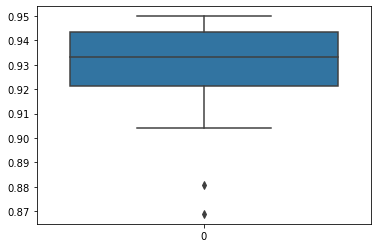

In [54]:
sns.boxplot(data=cat_df['Cat R2']);

In [55]:
d1 = pd.read_csv('OrdinalDrop1.csv')
d1.shape

(2579, 83)

In [56]:
X = d1.drop(['SalePrice'], axis=1).values
y = d1.SalePrice.values

In [57]:
dfs = evaluate_model(CatBoostRegressor(), X, y)

742:	learn: 7762.7902789	total: 4.86s	remaining: 1.68s
743:	learn: 7758.7699558	total: 4.87s	remaining: 1.68s
744:	learn: 7747.5660464	total: 4.88s	remaining: 1.67s
745:	learn: 7738.8624308	total: 4.88s	remaining: 1.66s
746:	learn: 7729.3047790	total: 4.9s	remaining: 1.66s
747:	learn: 7720.2816886	total: 4.9s	remaining: 1.65s
748:	learn: 7711.8041971	total: 4.9s	remaining: 1.64s
749:	learn: 7703.3622465	total: 4.91s	remaining: 1.64s
750:	learn: 7699.1248447	total: 4.91s	remaining: 1.63s
751:	learn: 7692.0267978	total: 4.92s	remaining: 1.62s
752:	learn: 7686.9567904	total: 4.93s	remaining: 1.62s
753:	learn: 7686.2337649	total: 4.95s	remaining: 1.61s
754:	learn: 7678.1418355	total: 4.96s	remaining: 1.61s
755:	learn: 7671.5557964	total: 4.96s	remaining: 1.6s
756:	learn: 7664.3892125	total: 4.97s	remaining: 1.59s
757:	learn: 7659.6193876	total: 4.97s	remaining: 1.59s
758:	learn: 7649.1775670	total: 4.98s	remaining: 1.58s
759:	learn: 7642.3266148	total: 4.98s	remaining: 1.57s
760:	learn: 76

784:	learn: 7150.7483342	total: 4.41s	remaining: 1.21s
785:	learn: 7146.2922414	total: 4.42s	remaining: 1.2s
786:	learn: 7138.6785149	total: 4.42s	remaining: 1.2s
787:	learn: 7132.4770397	total: 4.43s	remaining: 1.19s
788:	learn: 7121.9317358	total: 4.44s	remaining: 1.19s
789:	learn: 7116.0845034	total: 4.44s	remaining: 1.18s
790:	learn: 7111.8932010	total: 4.44s	remaining: 1.17s
791:	learn: 7105.8868317	total: 4.45s	remaining: 1.17s
792:	learn: 7099.9377291	total: 4.45s	remaining: 1.16s
793:	learn: 7093.3343594	total: 4.46s	remaining: 1.16s
794:	learn: 7081.9973168	total: 4.47s	remaining: 1.15s
795:	learn: 7072.2458039	total: 4.47s	remaining: 1.15s
796:	learn: 7067.2313003	total: 4.47s	remaining: 1.14s
797:	learn: 7060.8778709	total: 4.48s	remaining: 1.13s
798:	learn: 7054.7471179	total: 4.49s	remaining: 1.13s
799:	learn: 7049.5695738	total: 4.5s	remaining: 1.12s
800:	learn: 7046.3684546	total: 4.51s	remaining: 1.12s
801:	learn: 7039.5581653	total: 4.51s	remaining: 1.11s
802:	learn: 7

892:	learn: 6822.7769730	total: 5.95s	remaining: 713ms
893:	learn: 6815.9902486	total: 5.95s	remaining: 706ms
894:	learn: 6810.3978983	total: 5.96s	remaining: 699ms
895:	learn: 6802.3681356	total: 5.96s	remaining: 692ms
896:	learn: 6802.1607384	total: 5.97s	remaining: 686ms
897:	learn: 6797.7579851	total: 5.98s	remaining: 679ms
898:	learn: 6795.7726208	total: 5.98s	remaining: 672ms
899:	learn: 6790.8002112	total: 5.99s	remaining: 665ms
900:	learn: 6785.1283914	total: 5.99s	remaining: 658ms
901:	learn: 6779.0631540	total: 6s	remaining: 652ms
902:	learn: 6778.3260541	total: 6s	remaining: 645ms
903:	learn: 6771.7652167	total: 6.01s	remaining: 638ms
904:	learn: 6766.4193866	total: 6.01s	remaining: 631ms
905:	learn: 6759.5292284	total: 6.02s	remaining: 625ms
906:	learn: 6753.7349555	total: 6.02s	remaining: 618ms
907:	learn: 6747.9341869	total: 6.03s	remaining: 611ms
908:	learn: 6742.5932252	total: 6.03s	remaining: 604ms
909:	learn: 6736.9074622	total: 6.04s	remaining: 598ms
910:	learn: 6732

934:	learn: 6226.6858710	total: 5.35s	remaining: 372ms
935:	learn: 6226.3768888	total: 5.36s	remaining: 367ms
936:	learn: 6226.0750714	total: 5.37s	remaining: 361ms
937:	learn: 6218.2021899	total: 5.39s	remaining: 356ms
938:	learn: 6212.3902060	total: 5.39s	remaining: 350ms
939:	learn: 6206.9644086	total: 5.4s	remaining: 344ms
940:	learn: 6200.5986550	total: 5.41s	remaining: 339ms
941:	learn: 6196.4310262	total: 5.41s	remaining: 333ms
942:	learn: 6192.7711068	total: 5.42s	remaining: 327ms
943:	learn: 6186.2576258	total: 5.42s	remaining: 322ms
944:	learn: 6180.4926045	total: 5.43s	remaining: 316ms
945:	learn: 6174.7899862	total: 5.43s	remaining: 310ms
946:	learn: 6168.3590398	total: 5.44s	remaining: 304ms
947:	learn: 6165.8746706	total: 5.45s	remaining: 299ms
948:	learn: 6162.1224780	total: 5.45s	remaining: 293ms
949:	learn: 6157.1683541	total: 5.46s	remaining: 287ms
950:	learn: 6154.0528603	total: 5.46s	remaining: 281ms
951:	learn: 6147.9801297	total: 5.47s	remaining: 276ms
952:	learn:

41:	learn: 28630.5379529	total: 279ms	remaining: 6.37s
42:	learn: 28225.3181163	total: 284ms	remaining: 6.31s
43:	learn: 27843.1975550	total: 288ms	remaining: 6.25s
44:	learn: 27487.1723509	total: 292ms	remaining: 6.2s
45:	learn: 27129.2999150	total: 302ms	remaining: 6.27s
46:	learn: 26782.0205901	total: 307ms	remaining: 6.22s
47:	learn: 26464.9850057	total: 315ms	remaining: 6.25s
48:	learn: 26123.3662849	total: 319ms	remaining: 6.2s
49:	learn: 25793.7557539	total: 324ms	remaining: 6.16s
50:	learn: 25523.1338705	total: 333ms	remaining: 6.19s
51:	learn: 25215.8237069	total: 337ms	remaining: 6.15s
52:	learn: 24948.0487903	total: 342ms	remaining: 6.11s
53:	learn: 24737.9060584	total: 361ms	remaining: 6.33s
54:	learn: 24523.2838303	total: 368ms	remaining: 6.32s
55:	learn: 24266.3765955	total: 375ms	remaining: 6.31s
56:	learn: 24053.8412662	total: 382ms	remaining: 6.32s
57:	learn: 23807.0945274	total: 398ms	remaining: 6.46s
58:	learn: 23579.2028758	total: 404ms	remaining: 6.45s
59:	learn: 2

83:	learn: 19809.3225222	total: 598ms	remaining: 6.53s
84:	learn: 19710.5397364	total: 603ms	remaining: 6.49s
85:	learn: 19608.4620033	total: 613ms	remaining: 6.52s
86:	learn: 19504.7504681	total: 617ms	remaining: 6.48s
87:	learn: 19395.7450477	total: 623ms	remaining: 6.45s
88:	learn: 19310.6217097	total: 636ms	remaining: 6.51s
89:	learn: 19238.1236556	total: 645ms	remaining: 6.53s
90:	learn: 19169.0433942	total: 654ms	remaining: 6.53s
91:	learn: 19101.9637859	total: 659ms	remaining: 6.5s
92:	learn: 19031.8974747	total: 668ms	remaining: 6.52s
93:	learn: 18949.2550082	total: 673ms	remaining: 6.48s
94:	learn: 18881.4609846	total: 681ms	remaining: 6.49s
95:	learn: 18805.1383784	total: 690ms	remaining: 6.49s
96:	learn: 18738.3941668	total: 695ms	remaining: 6.47s
97:	learn: 18676.9302281	total: 700ms	remaining: 6.44s
98:	learn: 18602.3613177	total: 704ms	remaining: 6.4s
99:	learn: 18515.7017289	total: 707ms	remaining: 6.37s
100:	learn: 18448.3179171	total: 712ms	remaining: 6.33s
101:	learn:

137:	learn: 16149.8251041	total: 1.03s	remaining: 6.43s
138:	learn: 16101.2094308	total: 1.04s	remaining: 6.42s
139:	learn: 16064.8667616	total: 1.04s	remaining: 6.39s
140:	learn: 16016.3073461	total: 1.05s	remaining: 6.37s
141:	learn: 15980.2114546	total: 1.05s	remaining: 6.36s
142:	learn: 15940.6467423	total: 1.06s	remaining: 6.34s
143:	learn: 15908.7097843	total: 1.07s	remaining: 6.36s
144:	learn: 15874.8675155	total: 1.07s	remaining: 6.33s
145:	learn: 15853.9248124	total: 1.08s	remaining: 6.3s
146:	learn: 15827.4839608	total: 1.09s	remaining: 6.3s
147:	learn: 15786.3289601	total: 1.09s	remaining: 6.28s
148:	learn: 15746.4103268	total: 1.09s	remaining: 6.25s
149:	learn: 15698.5224142	total: 1.1s	remaining: 6.24s
150:	learn: 15675.3900887	total: 1.1s	remaining: 6.21s
151:	learn: 15631.1386669	total: 1.11s	remaining: 6.18s
152:	learn: 15600.5981868	total: 1.11s	remaining: 6.17s
153:	learn: 15560.6036976	total: 1.13s	remaining: 6.18s
154:	learn: 15522.7026147	total: 1.14s	remaining: 6.

231:	learn: 13460.0649481	total: 1.72s	remaining: 5.7s
232:	learn: 13431.7299685	total: 1.73s	remaining: 5.69s
233:	learn: 13403.6169912	total: 1.74s	remaining: 5.69s
234:	learn: 13378.2199048	total: 1.74s	remaining: 5.68s
235:	learn: 13355.9061266	total: 1.75s	remaining: 5.67s
236:	learn: 13333.2533121	total: 1.76s	remaining: 5.65s
237:	learn: 13308.4680087	total: 1.76s	remaining: 5.63s
238:	learn: 13286.6370467	total: 1.76s	remaining: 5.62s
239:	learn: 13258.2935913	total: 1.77s	remaining: 5.6s
240:	learn: 13231.8196855	total: 1.77s	remaining: 5.58s
241:	learn: 13203.9377072	total: 1.78s	remaining: 5.57s
242:	learn: 13173.9385484	total: 1.79s	remaining: 5.57s
243:	learn: 13157.5326148	total: 1.79s	remaining: 5.56s
244:	learn: 13134.4767652	total: 1.8s	remaining: 5.56s
245:	learn: 13119.6934715	total: 1.81s	remaining: 5.55s
246:	learn: 13096.6433559	total: 1.82s	remaining: 5.55s
247:	learn: 13070.4143957	total: 1.83s	remaining: 5.54s
248:	learn: 13051.3257929	total: 1.83s	remaining: 5

232:	learn: 14135.6505226	total: 1.72s	remaining: 5.67s
233:	learn: 14116.2590663	total: 1.74s	remaining: 5.68s
234:	learn: 14090.0569909	total: 1.74s	remaining: 5.66s
235:	learn: 14065.0315957	total: 1.74s	remaining: 5.65s
236:	learn: 14033.2108278	total: 1.76s	remaining: 5.67s
237:	learn: 14015.1992154	total: 1.77s	remaining: 5.67s
238:	learn: 13994.9968971	total: 1.78s	remaining: 5.66s
239:	learn: 13971.6112095	total: 1.78s	remaining: 5.64s
240:	learn: 13938.4219857	total: 1.79s	remaining: 5.63s
241:	learn: 13924.6576712	total: 1.8s	remaining: 5.63s
242:	learn: 13909.7961038	total: 1.81s	remaining: 5.63s
243:	learn: 13879.5766190	total: 1.81s	remaining: 5.61s
244:	learn: 13858.0316457	total: 1.82s	remaining: 5.6s
245:	learn: 13833.2773120	total: 1.82s	remaining: 5.58s
246:	learn: 13801.8764633	total: 1.83s	remaining: 5.58s
247:	learn: 13787.8228975	total: 1.83s	remaining: 5.56s
248:	learn: 13761.3956945	total: 1.84s	remaining: 5.55s
249:	learn: 13735.0342794	total: 1.85s	remaining: 

336:	learn: 11437.1925824	total: 2.39s	remaining: 4.7s
337:	learn: 11420.5157385	total: 2.4s	remaining: 4.69s
338:	learn: 11401.9911826	total: 2.41s	remaining: 4.69s
339:	learn: 11390.3681051	total: 2.41s	remaining: 4.68s
340:	learn: 11369.6848152	total: 2.42s	remaining: 4.67s
341:	learn: 11362.0330890	total: 2.42s	remaining: 4.67s
342:	learn: 11351.0859212	total: 2.43s	remaining: 4.66s
343:	learn: 11339.0576051	total: 2.44s	remaining: 4.66s
344:	learn: 11325.8051190	total: 2.46s	remaining: 4.66s
345:	learn: 11305.9642276	total: 2.46s	remaining: 4.66s
346:	learn: 11290.5047494	total: 2.47s	remaining: 4.65s
347:	learn: 11275.1765887	total: 2.48s	remaining: 4.64s
348:	learn: 11260.6508883	total: 2.48s	remaining: 4.63s
349:	learn: 11243.9989483	total: 2.49s	remaining: 4.63s
350:	learn: 11218.4874406	total: 2.5s	remaining: 4.62s
351:	learn: 11205.1125591	total: 2.51s	remaining: 4.61s
352:	learn: 11184.0360186	total: 2.51s	remaining: 4.6s
353:	learn: 11168.9250010	total: 2.52s	remaining: 4.

378:	learn: 10852.4308316	total: 2.66s	remaining: 4.37s
379:	learn: 10835.9271559	total: 2.67s	remaining: 4.36s
380:	learn: 10828.4183427	total: 2.67s	remaining: 4.34s
381:	learn: 10819.5661401	total: 2.68s	remaining: 4.33s
382:	learn: 10803.7400229	total: 2.68s	remaining: 4.32s
383:	learn: 10787.7421570	total: 2.69s	remaining: 4.32s
384:	learn: 10772.5012796	total: 2.7s	remaining: 4.31s
385:	learn: 10751.7199880	total: 2.7s	remaining: 4.3s
386:	learn: 10749.3493958	total: 2.71s	remaining: 4.29s
387:	learn: 10731.8805594	total: 2.71s	remaining: 4.28s
388:	learn: 10718.9915291	total: 2.72s	remaining: 4.27s
389:	learn: 10705.8625282	total: 2.72s	remaining: 4.25s
390:	learn: 10688.8409791	total: 2.73s	remaining: 4.25s
391:	learn: 10674.8898746	total: 2.74s	remaining: 4.25s
392:	learn: 10655.5719254	total: 2.75s	remaining: 4.24s
393:	learn: 10633.9013538	total: 2.75s	remaining: 4.23s
394:	learn: 10611.8419691	total: 2.76s	remaining: 4.22s
395:	learn: 10601.5559174	total: 2.77s	remaining: 4

379:	learn: 11315.5040311	total: 2.85s	remaining: 4.65s
380:	learn: 11305.5967854	total: 2.86s	remaining: 4.64s
381:	learn: 11289.6833477	total: 2.86s	remaining: 4.63s
382:	learn: 11278.0751194	total: 2.87s	remaining: 4.62s
383:	learn: 11262.4416875	total: 2.87s	remaining: 4.61s
384:	learn: 11252.4575410	total: 2.88s	remaining: 4.6s
385:	learn: 11243.1967863	total: 2.88s	remaining: 4.59s
386:	learn: 11227.7238878	total: 2.9s	remaining: 4.59s
387:	learn: 11210.5658659	total: 2.9s	remaining: 4.58s
388:	learn: 11189.9789592	total: 2.91s	remaining: 4.57s
389:	learn: 11167.1496484	total: 2.92s	remaining: 4.57s
390:	learn: 11151.4370098	total: 2.92s	remaining: 4.56s
391:	learn: 11140.8903086	total: 2.94s	remaining: 4.55s
392:	learn: 11119.9266536	total: 2.94s	remaining: 4.54s
393:	learn: 11101.5049120	total: 2.94s	remaining: 4.53s
394:	learn: 11090.1835115	total: 2.96s	remaining: 4.53s
395:	learn: 11078.1613168	total: 2.97s	remaining: 4.54s
396:	learn: 11066.2976193	total: 2.98s	remaining: 4

484:	learn: 9358.2118926	total: 3.46s	remaining: 3.68s
485:	learn: 9351.8998301	total: 3.47s	remaining: 3.67s
486:	learn: 9336.7820285	total: 3.48s	remaining: 3.66s
487:	learn: 9322.2511352	total: 3.48s	remaining: 3.65s
488:	learn: 9311.0725339	total: 3.49s	remaining: 3.65s
489:	learn: 9300.8406123	total: 3.5s	remaining: 3.64s
490:	learn: 9287.3284697	total: 3.51s	remaining: 3.63s
491:	learn: 9281.2384115	total: 3.51s	remaining: 3.63s
492:	learn: 9270.5750900	total: 3.52s	remaining: 3.62s
493:	learn: 9261.9034762	total: 3.54s	remaining: 3.63s
494:	learn: 9250.3073007	total: 3.54s	remaining: 3.62s
495:	learn: 9239.2496306	total: 3.55s	remaining: 3.61s
496:	learn: 9228.1637065	total: 3.56s	remaining: 3.6s
497:	learn: 9220.3043442	total: 3.56s	remaining: 3.59s
498:	learn: 9208.9768473	total: 3.57s	remaining: 3.58s
499:	learn: 9190.5436167	total: 3.58s	remaining: 3.58s
500:	learn: 9182.2341617	total: 3.6s	remaining: 3.58s
501:	learn: 9169.4909768	total: 3.6s	remaining: 3.58s
502:	learn: 91

527:	learn: 9135.7864826	total: 3.73s	remaining: 3.33s
528:	learn: 9124.7944235	total: 3.73s	remaining: 3.33s
529:	learn: 9113.5228428	total: 3.74s	remaining: 3.32s
530:	learn: 9098.4892112	total: 3.75s	remaining: 3.31s
531:	learn: 9083.6723378	total: 3.77s	remaining: 3.31s
532:	learn: 9074.7812864	total: 3.78s	remaining: 3.31s
533:	learn: 9062.1046609	total: 3.78s	remaining: 3.3s
534:	learn: 9049.7711506	total: 3.79s	remaining: 3.3s
535:	learn: 9037.3264317	total: 3.8s	remaining: 3.29s
536:	learn: 9022.9684778	total: 3.81s	remaining: 3.28s
537:	learn: 9011.9837733	total: 3.82s	remaining: 3.28s
538:	learn: 9000.6352468	total: 3.83s	remaining: 3.27s
539:	learn: 8991.6152580	total: 3.83s	remaining: 3.26s
540:	learn: 8971.2845288	total: 3.84s	remaining: 3.25s
541:	learn: 8964.1461999	total: 3.85s	remaining: 3.25s
542:	learn: 8947.6445843	total: 3.86s	remaining: 3.25s
543:	learn: 8934.0970818	total: 3.86s	remaining: 3.24s
544:	learn: 8923.3117763	total: 3.87s	remaining: 3.23s
545:	learn: 8

528:	learn: 9106.3121428	total: 3.86s	remaining: 3.44s
529:	learn: 9095.0389391	total: 3.87s	remaining: 3.43s
530:	learn: 9085.4767985	total: 3.88s	remaining: 3.42s
531:	learn: 9072.9968671	total: 3.88s	remaining: 3.41s
532:	learn: 9066.0783911	total: 3.89s	remaining: 3.41s
533:	learn: 9057.4872261	total: 3.89s	remaining: 3.4s
534:	learn: 9048.0699118	total: 3.9s	remaining: 3.39s
535:	learn: 9039.7179886	total: 3.91s	remaining: 3.38s
536:	learn: 9027.7983081	total: 3.91s	remaining: 3.38s
537:	learn: 9013.1310644	total: 3.92s	remaining: 3.37s
538:	learn: 9001.7159032	total: 3.94s	remaining: 3.37s
539:	learn: 8988.7276838	total: 3.94s	remaining: 3.36s
540:	learn: 8982.7061922	total: 3.96s	remaining: 3.36s
541:	learn: 8971.0994342	total: 3.96s	remaining: 3.35s
542:	learn: 8964.1167346	total: 3.98s	remaining: 3.35s
543:	learn: 8952.6533571	total: 3.98s	remaining: 3.34s
544:	learn: 8943.2959110	total: 4s	remaining: 3.34s
545:	learn: 8931.9038009	total: 4s	remaining: 3.33s
546:	learn: 8921.8

634:	learn: 7902.2954335	total: 4.61s	remaining: 2.65s
635:	learn: 7897.9154364	total: 4.62s	remaining: 2.65s
636:	learn: 7882.1127133	total: 4.63s	remaining: 2.64s
637:	learn: 7879.4808342	total: 4.64s	remaining: 2.63s
638:	learn: 7875.9585589	total: 4.64s	remaining: 2.62s
639:	learn: 7866.6678307	total: 4.65s	remaining: 2.61s
640:	learn: 7859.3320344	total: 4.65s	remaining: 2.6s
641:	learn: 7850.7724213	total: 4.66s	remaining: 2.6s
642:	learn: 7845.0170558	total: 4.67s	remaining: 2.59s
643:	learn: 7831.7031057	total: 4.67s	remaining: 2.58s
644:	learn: 7824.1209870	total: 4.67s	remaining: 2.57s
645:	learn: 7815.8097557	total: 4.68s	remaining: 2.56s
646:	learn: 7805.8884005	total: 4.68s	remaining: 2.55s
647:	learn: 7805.1108794	total: 4.68s	remaining: 2.54s
648:	learn: 7799.5593334	total: 4.7s	remaining: 2.54s
649:	learn: 7791.5745833	total: 4.7s	remaining: 2.53s
650:	learn: 7785.5378194	total: 4.71s	remaining: 2.52s
651:	learn: 7779.1721538	total: 4.71s	remaining: 2.52s
652:	learn: 77

677:	learn: 7743.9403937	total: 4.82s	remaining: 2.29s
678:	learn: 7735.0869017	total: 4.83s	remaining: 2.28s
679:	learn: 7733.1682028	total: 4.84s	remaining: 2.28s
680:	learn: 7725.1367397	total: 4.85s	remaining: 2.27s
681:	learn: 7717.1012098	total: 4.85s	remaining: 2.26s
682:	learn: 7711.0292289	total: 4.86s	remaining: 2.25s
683:	learn: 7699.1171499	total: 4.86s	remaining: 2.25s
684:	learn: 7691.6842947	total: 4.87s	remaining: 2.24s
685:	learn: 7675.4885750	total: 4.87s	remaining: 2.23s
686:	learn: 7665.4014561	total: 4.88s	remaining: 2.22s
687:	learn: 7654.3003035	total: 4.88s	remaining: 2.21s
688:	learn: 7650.8604825	total: 4.9s	remaining: 2.21s
689:	learn: 7644.0469514	total: 4.91s	remaining: 2.21s
690:	learn: 7633.9108462	total: 4.91s	remaining: 2.2s
691:	learn: 7627.6188626	total: 4.93s	remaining: 2.19s
692:	learn: 7619.2175999	total: 4.94s	remaining: 2.19s
693:	learn: 7611.6313022	total: 4.94s	remaining: 2.18s
694:	learn: 7607.3118894	total: 4.95s	remaining: 2.17s
695:	learn: 

678:	learn: 7790.0174778	total: 5s	remaining: 2.36s
679:	learn: 7782.1233695	total: 5s	remaining: 2.35s
680:	learn: 7774.2724942	total: 5.01s	remaining: 2.35s
681:	learn: 7773.9209276	total: 5.02s	remaining: 2.34s
682:	learn: 7762.7439048	total: 5.03s	remaining: 2.33s
683:	learn: 7753.8235149	total: 5.04s	remaining: 2.33s
684:	learn: 7753.4823962	total: 5.07s	remaining: 2.33s
685:	learn: 7746.5489500	total: 5.09s	remaining: 2.33s
686:	learn: 7739.5330924	total: 5.1s	remaining: 2.33s
687:	learn: 7731.1616896	total: 5.12s	remaining: 2.32s
688:	learn: 7719.2136929	total: 5.13s	remaining: 2.31s
689:	learn: 7718.4756993	total: 5.13s	remaining: 2.3s
690:	learn: 7712.2125811	total: 5.13s	remaining: 2.3s
691:	learn: 7701.1578094	total: 5.15s	remaining: 2.29s
692:	learn: 7691.5255143	total: 5.16s	remaining: 2.29s
693:	learn: 7683.4750787	total: 5.17s	remaining: 2.28s
694:	learn: 7674.3790124	total: 5.18s	remaining: 2.27s
695:	learn: 7661.5198832	total: 5.19s	remaining: 2.27s
696:	learn: 7661.19

784:	learn: 6829.3588724	total: 5.55s	remaining: 1.52s
785:	learn: 6822.0880792	total: 5.56s	remaining: 1.51s
786:	learn: 6821.5694940	total: 5.56s	remaining: 1.5s
787:	learn: 6813.0794239	total: 5.56s	remaining: 1.5s
788:	learn: 6808.5693942	total: 5.57s	remaining: 1.49s
789:	learn: 6807.8311818	total: 5.57s	remaining: 1.48s
790:	learn: 6805.7267167	total: 5.58s	remaining: 1.47s
791:	learn: 6800.2004368	total: 5.59s	remaining: 1.47s
792:	learn: 6792.1771246	total: 5.59s	remaining: 1.46s
793:	learn: 6786.5029385	total: 5.6s	remaining: 1.45s
794:	learn: 6776.8774877	total: 5.6s	remaining: 1.45s
795:	learn: 6768.0703741	total: 5.61s	remaining: 1.44s
796:	learn: 6761.4246348	total: 5.61s	remaining: 1.43s
797:	learn: 6755.9677633	total: 5.63s	remaining: 1.42s
798:	learn: 6748.8748085	total: 5.63s	remaining: 1.42s
799:	learn: 6747.8125887	total: 5.63s	remaining: 1.41s
800:	learn: 6741.1643130	total: 5.64s	remaining: 1.4s
801:	learn: 6735.5652767	total: 5.66s	remaining: 1.4s
802:	learn: 6730

827:	learn: 6712.6625829	total: 5.9s	remaining: 1.23s
828:	learn: 6706.3659563	total: 5.91s	remaining: 1.22s
829:	learn: 6703.5108861	total: 5.92s	remaining: 1.21s
830:	learn: 6700.1637365	total: 5.94s	remaining: 1.21s
831:	learn: 6692.4653279	total: 5.94s	remaining: 1.2s
832:	learn: 6689.4445937	total: 5.95s	remaining: 1.19s
833:	learn: 6681.7009667	total: 5.95s	remaining: 1.19s
834:	learn: 6673.1226113	total: 5.97s	remaining: 1.18s
835:	learn: 6671.4872621	total: 5.98s	remaining: 1.17s
836:	learn: 6664.5938105	total: 5.98s	remaining: 1.16s
837:	learn: 6658.0751599	total: 5.99s	remaining: 1.16s
838:	learn: 6652.5322535	total: 6s	remaining: 1.15s
839:	learn: 6646.2976085	total: 6s	remaining: 1.14s
840:	learn: 6643.1701437	total: 6.01s	remaining: 1.14s
841:	learn: 6633.1712700	total: 6.03s	remaining: 1.13s
842:	learn: 6626.3488777	total: 6.04s	remaining: 1.13s
843:	learn: 6620.9656132	total: 6.05s	remaining: 1.12s
844:	learn: 6614.0614634	total: 6.06s	remaining: 1.11s
845:	learn: 6607.0

827:	learn: 6713.0883124	total: 6.09s	remaining: 1.26s
828:	learn: 6704.3090465	total: 6.1s	remaining: 1.26s
829:	learn: 6703.8370508	total: 6.1s	remaining: 1.25s
830:	learn: 6699.4865906	total: 6.11s	remaining: 1.24s
831:	learn: 6689.4348498	total: 6.11s	remaining: 1.23s
832:	learn: 6681.4746114	total: 6.12s	remaining: 1.23s
833:	learn: 6675.2224168	total: 6.12s	remaining: 1.22s
834:	learn: 6664.2607444	total: 6.14s	remaining: 1.21s
835:	learn: 6656.0966785	total: 6.15s	remaining: 1.21s
836:	learn: 6651.8984992	total: 6.15s	remaining: 1.2s
837:	learn: 6644.3010208	total: 6.17s	remaining: 1.19s
838:	learn: 6636.7527509	total: 6.18s	remaining: 1.19s
839:	learn: 6630.0387498	total: 6.19s	remaining: 1.18s
840:	learn: 6621.5548240	total: 6.2s	remaining: 1.17s
841:	learn: 6613.2690956	total: 6.2s	remaining: 1.16s
842:	learn: 6607.3685594	total: 6.21s	remaining: 1.16s
843:	learn: 6601.4425723	total: 6.21s	remaining: 1.15s
844:	learn: 6599.1103210	total: 6.22s	remaining: 1.14s
845:	learn: 659

934:	learn: 5934.4806020	total: 6.72s	remaining: 467ms
935:	learn: 5927.5399509	total: 6.74s	remaining: 461ms
936:	learn: 5921.4555276	total: 6.76s	remaining: 455ms
937:	learn: 5911.7082065	total: 6.77s	remaining: 448ms
938:	learn: 5906.2975205	total: 6.78s	remaining: 441ms
939:	learn: 5900.1587718	total: 6.8s	remaining: 434ms
940:	learn: 5892.4712505	total: 6.82s	remaining: 428ms
941:	learn: 5885.6618653	total: 6.82s	remaining: 420ms
942:	learn: 5883.6534718	total: 6.83s	remaining: 413ms
943:	learn: 5878.1372732	total: 6.83s	remaining: 405ms
944:	learn: 5873.1086086	total: 6.84s	remaining: 398ms
945:	learn: 5865.1425691	total: 6.84s	remaining: 391ms
946:	learn: 5861.7265789	total: 6.85s	remaining: 383ms
947:	learn: 5855.7890879	total: 6.85s	remaining: 376ms
948:	learn: 5849.9669313	total: 6.86s	remaining: 369ms
949:	learn: 5844.6324580	total: 6.87s	remaining: 362ms
950:	learn: 5837.4078922	total: 6.88s	remaining: 354ms
951:	learn: 5831.5543245	total: 6.88s	remaining: 347ms
952:	learn:

974:	learn: 5973.8665406	total: 7.1s	remaining: 182ms
975:	learn: 5973.2505735	total: 7.11s	remaining: 175ms
976:	learn: 5972.6909286	total: 7.11s	remaining: 167ms
977:	learn: 5964.8348549	total: 7.12s	remaining: 160ms
978:	learn: 5957.2235167	total: 7.12s	remaining: 153ms
979:	learn: 5954.4070162	total: 7.13s	remaining: 145ms
980:	learn: 5947.5631395	total: 7.13s	remaining: 138ms
981:	learn: 5937.9330036	total: 7.14s	remaining: 131ms
982:	learn: 5933.2436314	total: 7.15s	remaining: 124ms
983:	learn: 5928.0673265	total: 7.16s	remaining: 116ms
984:	learn: 5921.7645311	total: 7.17s	remaining: 109ms
985:	learn: 5914.9530907	total: 7.18s	remaining: 102ms
986:	learn: 5911.6069257	total: 7.18s	remaining: 94.6ms
987:	learn: 5906.4890312	total: 7.19s	remaining: 87.3ms
988:	learn: 5900.3946811	total: 7.2s	remaining: 80.1ms
989:	learn: 5891.8962146	total: 7.2s	remaining: 72.8ms
990:	learn: 5887.9503601	total: 7.21s	remaining: 65.5ms
991:	learn: 5885.7288694	total: 7.21s	remaining: 58.2ms
992:	le

83:	learn: 19835.3335240	total: 564ms	remaining: 6.15s
84:	learn: 19744.1035701	total: 569ms	remaining: 6.13s
85:	learn: 19630.0181172	total: 573ms	remaining: 6.09s
86:	learn: 19546.7857262	total: 577ms	remaining: 6.06s
87:	learn: 19467.8444229	total: 586ms	remaining: 6.07s
88:	learn: 19408.5170676	total: 593ms	remaining: 6.07s
89:	learn: 19338.2626805	total: 599ms	remaining: 6.06s
90:	learn: 19272.0360344	total: 603ms	remaining: 6.02s
91:	learn: 19201.2790605	total: 608ms	remaining: 6s
92:	learn: 19121.1460609	total: 616ms	remaining: 6s
93:	learn: 19041.7234431	total: 620ms	remaining: 5.97s
94:	learn: 18986.5589791	total: 627ms	remaining: 5.97s
95:	learn: 18913.4871334	total: 636ms	remaining: 5.99s
96:	learn: 18840.3952830	total: 643ms	remaining: 5.99s
97:	learn: 18782.1788107	total: 649ms	remaining: 5.97s
98:	learn: 18729.6871571	total: 654ms	remaining: 5.96s
99:	learn: 18663.2345631	total: 658ms	remaining: 5.92s
100:	learn: 18604.6596787	total: 669ms	remaining: 5.96s
101:	learn: 185

127:	learn: 17445.4922820	total: 801ms	remaining: 5.45s
128:	learn: 17405.9456961	total: 806ms	remaining: 5.44s
129:	learn: 17340.9504001	total: 815ms	remaining: 5.45s
130:	learn: 17307.8461518	total: 822ms	remaining: 5.45s
131:	learn: 17260.5551049	total: 832ms	remaining: 5.47s
132:	learn: 17215.1728011	total: 840ms	remaining: 5.48s
133:	learn: 17175.2882245	total: 847ms	remaining: 5.47s
134:	learn: 17123.0938855	total: 853ms	remaining: 5.46s
135:	learn: 17072.2590454	total: 861ms	remaining: 5.47s
136:	learn: 17026.7363323	total: 867ms	remaining: 5.46s
137:	learn: 16988.5846786	total: 872ms	remaining: 5.45s
138:	learn: 16950.2320484	total: 877ms	remaining: 5.43s
139:	learn: 16884.8957661	total: 882ms	remaining: 5.42s
140:	learn: 16843.0059660	total: 887ms	remaining: 5.4s
141:	learn: 16799.6833911	total: 892ms	remaining: 5.39s
142:	learn: 16770.2407719	total: 896ms	remaining: 5.37s
143:	learn: 16729.3137502	total: 901ms	remaining: 5.35s
144:	learn: 16693.2263185	total: 908ms	remaining:

126:	learn: 17735.4947703	total: 849ms	remaining: 5.84s
127:	learn: 17683.9997132	total: 855ms	remaining: 5.83s
128:	learn: 17641.1878320	total: 864ms	remaining: 5.84s
129:	learn: 17562.3356242	total: 869ms	remaining: 5.82s
130:	learn: 17522.2431069	total: 879ms	remaining: 5.83s
131:	learn: 17483.8365003	total: 885ms	remaining: 5.82s
132:	learn: 17449.5221664	total: 894ms	remaining: 5.83s
133:	learn: 17410.1654110	total: 901ms	remaining: 5.82s
134:	learn: 17375.4960809	total: 908ms	remaining: 5.82s
135:	learn: 17333.4910594	total: 914ms	remaining: 5.8s
136:	learn: 17303.6670225	total: 917ms	remaining: 5.78s
137:	learn: 17259.0730104	total: 922ms	remaining: 5.76s
138:	learn: 17220.0401495	total: 929ms	remaining: 5.75s
139:	learn: 17179.6955217	total: 936ms	remaining: 5.75s
140:	learn: 17136.4119371	total: 940ms	remaining: 5.73s
141:	learn: 17091.5243360	total: 945ms	remaining: 5.71s
142:	learn: 17059.3743045	total: 950ms	remaining: 5.69s
143:	learn: 17024.8472789	total: 955ms	remaining:

231:	learn: 14003.0622297	total: 1.52s	remaining: 5.05s
232:	learn: 13974.8181899	total: 1.53s	remaining: 5.04s
233:	learn: 13957.8138499	total: 1.53s	remaining: 5.02s
234:	learn: 13931.6940721	total: 1.54s	remaining: 5.01s
235:	learn: 13894.6063526	total: 1.54s	remaining: 5s
236:	learn: 13883.1397689	total: 1.55s	remaining: 5s
237:	learn: 13850.0487887	total: 1.56s	remaining: 5s
238:	learn: 13825.8527951	total: 1.57s	remaining: 4.99s
239:	learn: 13798.1289801	total: 1.57s	remaining: 4.98s
240:	learn: 13771.2065252	total: 1.57s	remaining: 4.96s
241:	learn: 13759.5004229	total: 1.58s	remaining: 4.95s
242:	learn: 13742.8999366	total: 1.59s	remaining: 4.94s
243:	learn: 13717.6985045	total: 1.59s	remaining: 4.94s
244:	learn: 13695.8709816	total: 1.6s	remaining: 4.93s
245:	learn: 13669.0004174	total: 1.61s	remaining: 4.93s
246:	learn: 13654.3387700	total: 1.61s	remaining: 4.92s
247:	learn: 13631.0856131	total: 1.62s	remaining: 4.91s
248:	learn: 13609.9939888	total: 1.63s	remaining: 4.91s
24

273:	learn: 13049.6915942	total: 1.72s	remaining: 4.57s
274:	learn: 13034.1330635	total: 1.73s	remaining: 4.55s
275:	learn: 13027.7661317	total: 1.73s	remaining: 4.54s
276:	learn: 13003.8471730	total: 1.74s	remaining: 4.53s
277:	learn: 12978.1989994	total: 1.74s	remaining: 4.52s
278:	learn: 12974.6676089	total: 1.75s	remaining: 4.51s
279:	learn: 12957.4254883	total: 1.76s	remaining: 4.53s
280:	learn: 12948.2248395	total: 1.77s	remaining: 4.52s
281:	learn: 12939.9618363	total: 1.78s	remaining: 4.53s
282:	learn: 12937.3267839	total: 1.78s	remaining: 4.51s
283:	learn: 12912.8392675	total: 1.79s	remaining: 4.5s
284:	learn: 12895.3045811	total: 1.79s	remaining: 4.49s
285:	learn: 12882.4367501	total: 1.79s	remaining: 4.48s
286:	learn: 12859.6842822	total: 1.8s	remaining: 4.47s
287:	learn: 12828.5278647	total: 1.81s	remaining: 4.47s
288:	learn: 12810.9602006	total: 1.81s	remaining: 4.46s
289:	learn: 12791.4864259	total: 1.82s	remaining: 4.45s
290:	learn: 12768.0600542	total: 1.83s	remaining: 

420:	learn: 10489.1848921	total: 2.68s	remaining: 3.69s
421:	learn: 10475.1827254	total: 2.69s	remaining: 3.68s
422:	learn: 10459.5444284	total: 2.69s	remaining: 3.67s
423:	learn: 10454.6034027	total: 2.7s	remaining: 3.66s
424:	learn: 10438.3051616	total: 2.7s	remaining: 3.66s
425:	learn: 10437.1336009	total: 2.71s	remaining: 3.66s
426:	learn: 10424.9008271	total: 2.72s	remaining: 3.65s
427:	learn: 10411.4299956	total: 2.72s	remaining: 3.64s
428:	learn: 10393.7001533	total: 2.73s	remaining: 3.63s
429:	learn: 10378.0971744	total: 2.73s	remaining: 3.62s
430:	learn: 10361.1638999	total: 2.74s	remaining: 3.62s
431:	learn: 10360.0315385	total: 2.74s	remaining: 3.61s
432:	learn: 10344.2522123	total: 2.75s	remaining: 3.61s
433:	learn: 10330.0428717	total: 2.76s	remaining: 3.6s
434:	learn: 10313.2508183	total: 2.77s	remaining: 3.6s
435:	learn: 10301.9900411	total: 2.77s	remaining: 3.59s
436:	learn: 10287.5893391	total: 2.79s	remaining: 3.59s
437:	learn: 10281.1777373	total: 2.79s	remaining: 3.

420:	learn: 10727.8157272	total: 2.66s	remaining: 3.66s
421:	learn: 10713.1273442	total: 2.67s	remaining: 3.66s
422:	learn: 10696.5299957	total: 2.68s	remaining: 3.66s
423:	learn: 10695.5460599	total: 2.69s	remaining: 3.65s
424:	learn: 10681.9084537	total: 2.69s	remaining: 3.64s
425:	learn: 10666.8360590	total: 2.7s	remaining: 3.63s
426:	learn: 10662.2036879	total: 2.71s	remaining: 3.63s
427:	learn: 10650.3440048	total: 2.72s	remaining: 3.63s
428:	learn: 10630.6202601	total: 2.73s	remaining: 3.63s
429:	learn: 10619.3225056	total: 2.73s	remaining: 3.62s
430:	learn: 10603.1245958	total: 2.73s	remaining: 3.61s
431:	learn: 10586.4051832	total: 2.74s	remaining: 3.6s
432:	learn: 10580.8523295	total: 2.74s	remaining: 3.59s
433:	learn: 10562.8117046	total: 2.75s	remaining: 3.59s
434:	learn: 10546.1273425	total: 2.76s	remaining: 3.58s
435:	learn: 10527.8653745	total: 2.76s	remaining: 3.57s
436:	learn: 10509.8226269	total: 2.77s	remaining: 3.57s
437:	learn: 10500.9859095	total: 2.77s	remaining: 

569:	learn: 8893.7618791	total: 3.62s	remaining: 2.73s
570:	learn: 8879.2930929	total: 3.62s	remaining: 2.72s
571:	learn: 8874.3833397	total: 3.63s	remaining: 2.71s
572:	learn: 8860.3614761	total: 3.63s	remaining: 2.71s
573:	learn: 8859.7642127	total: 3.64s	remaining: 2.7s
574:	learn: 8846.3809296	total: 3.64s	remaining: 2.69s
575:	learn: 8837.5996795	total: 3.65s	remaining: 2.69s
576:	learn: 8826.2877146	total: 3.66s	remaining: 2.68s
577:	learn: 8824.0690442	total: 3.66s	remaining: 2.67s
578:	learn: 8815.3653836	total: 3.67s	remaining: 2.67s
579:	learn: 8807.7858808	total: 3.67s	remaining: 2.66s
580:	learn: 8795.4644470	total: 3.68s	remaining: 2.65s
581:	learn: 8785.4675473	total: 3.68s	remaining: 2.65s
582:	learn: 8776.8430443	total: 3.69s	remaining: 2.64s
583:	learn: 8770.3498288	total: 3.7s	remaining: 2.63s
584:	learn: 8761.3041016	total: 3.71s	remaining: 2.63s
585:	learn: 8753.1286939	total: 3.71s	remaining: 2.62s
586:	learn: 8737.0885401	total: 3.71s	remaining: 2.61s
587:	learn: 

569:	learn: 8975.6352216	total: 3.62s	remaining: 2.73s
570:	learn: 8968.2436004	total: 3.62s	remaining: 2.72s
571:	learn: 8960.6553069	total: 3.63s	remaining: 2.71s
572:	learn: 8946.0895781	total: 3.63s	remaining: 2.71s
573:	learn: 8936.7871080	total: 3.64s	remaining: 2.7s
574:	learn: 8919.1747481	total: 3.64s	remaining: 2.69s
575:	learn: 8916.9461735	total: 3.65s	remaining: 2.68s
576:	learn: 8902.3638640	total: 3.65s	remaining: 2.68s
577:	learn: 8889.4467025	total: 3.66s	remaining: 2.67s
578:	learn: 8879.8696698	total: 3.67s	remaining: 2.67s
579:	learn: 8868.2948847	total: 3.67s	remaining: 2.66s
580:	learn: 8856.1488130	total: 3.68s	remaining: 2.65s
581:	learn: 8849.5471203	total: 3.69s	remaining: 2.65s
582:	learn: 8840.6886198	total: 3.69s	remaining: 2.64s
583:	learn: 8827.5726254	total: 3.69s	remaining: 2.63s
584:	learn: 8815.0687574	total: 3.7s	remaining: 2.62s
585:	learn: 8807.4251044	total: 3.71s	remaining: 2.62s
586:	learn: 8799.9854140	total: 3.71s	remaining: 2.61s
587:	learn: 

676:	learn: 8000.5226282	total: 4.53s	remaining: 2.16s
677:	learn: 7991.9827168	total: 4.54s	remaining: 2.15s
678:	learn: 7985.4007653	total: 4.54s	remaining: 2.15s
679:	learn: 7980.3104455	total: 4.55s	remaining: 2.14s
680:	learn: 7972.1853052	total: 4.55s	remaining: 2.13s
681:	learn: 7966.8286035	total: 4.56s	remaining: 2.13s
682:	learn: 7961.7532595	total: 4.57s	remaining: 2.12s
683:	learn: 7953.5561048	total: 4.57s	remaining: 2.11s
684:	learn: 7947.5948488	total: 4.58s	remaining: 2.1s
685:	learn: 7937.9652780	total: 4.58s	remaining: 2.1s
686:	learn: 7929.3617797	total: 4.59s	remaining: 2.09s
687:	learn: 7917.8816343	total: 4.6s	remaining: 2.08s
688:	learn: 7908.8970466	total: 4.6s	remaining: 2.08s
689:	learn: 7900.1072106	total: 4.61s	remaining: 2.07s
690:	learn: 7885.0583564	total: 4.62s	remaining: 2.06s
691:	learn: 7878.1236204	total: 4.62s	remaining: 2.06s
692:	learn: 7868.3100301	total: 4.63s	remaining: 2.05s
693:	learn: 7857.5053945	total: 4.64s	remaining: 2.05s
694:	learn: 78

In [58]:
cat_df2 = dfs[['test_r2', 'test_neg_mae']]
cat_df2 = cat_df2.assign(MAE = cat_df2['test_neg_mae'].abs())
cat_df2 = cat_df2.rename(columns = {'test_r2':'Cat R2 D1', 'MAE':'Cat MAE D1'})
cat_df2

,Cat R2 D1,test_neg_mae,Cat MAE D1
0,0.929695,-12133.203845,12133.203845
1,0.948608,-11791.466321,11791.466321
2,0.945967,-10840.053691,10840.053691
3,0.911637,-12772.976135,12772.976135
4,0.950005,-12025.541186,12025.541186
5,0.932897,-11724.608183,11724.608183
6,0.932347,-11686.166314,11686.166314
7,0.929521,-12128.480820,12128.480820
8,0.948502,-11548.668756,11548.668756
9,0.940612,-12553.749778,12553.749778


In [59]:
cat_df2.describe()

,Cat R2 D1,test_neg_mae,Cat MAE D1
count,15.000000,15.000000,15.000000
mean,0.937368,-11892.797578,11892.797578
std,0.011602,551.342041,551.342041
min,0.911637,-12772.976135,10840.053691
25%,0.931021,-12253.423538,11617.417535
50%,0.940612,-11990.466494,11990.466494
75%,0.947234,-11617.417535,12253.423538
max,0.950005,-10840.053691,12772.976135


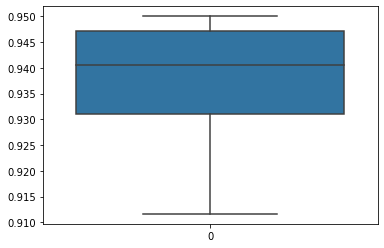

In [60]:
sns.boxplot(data=cat_df2['Cat R2 D1']);

In [61]:
combo = pd.concat([cat_df, cat_df2], axis=1)
#combo

In [62]:
cat_df2.to_csv('CBD1.csv', index=False)
#cat_df2

In [63]:
combo.describe()

,Cat R2,test_neg_mae,Cat MAE,Cat R2 D1,test_neg_mae,Cat MAE D1
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926167,-12117.578244,12117.578244,0.937368,-11892.797578,11892.797578
std,0.024153,770.852880,770.852880,0.011602,551.342041,551.342041
min,0.868960,-13876.404146,11004.275290,0.911637,-12772.976135,10840.053691
25%,0.921491,-12486.356378,11548.672292,0.931021,-12253.423538,11617.417535
50%,0.933368,-12022.860864,12022.860864,0.940612,-11990.466494,11990.466494
75%,0.943465,-11548.672292,12486.356378,0.947234,-11617.417535,12253.423538
max,0.949846,-11004.275290,13876.404146,0.950005,-10840.053691,12772.976135


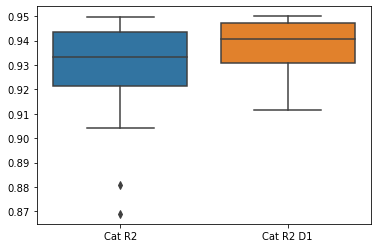

In [64]:
sns.boxplot(data=combo[['Cat R2', 'Cat R2 D1']]);

In [29]:
d2 = pd.read_csv('OrdinalDrop2.csv')
d2.shape

(2578, 83)

In [30]:
X = d2.drop(['SalePrice'], axis=1).values
y = d2.SalePrice.values

In [31]:
len(X)

2578

In [32]:
dfs = evaluate_model(CatBoostRegressor(), X, y)

720:	learn: 7544.2801642	total: 4.9s	remaining: 1.89s
721:	learn: 7532.4471476	total: 4.9s	remaining: 1.89s
722:	learn: 7523.0359538	total: 4.91s	remaining: 1.88s
723:	learn: 7516.2775992	total: 4.91s	remaining: 1.87s
724:	learn: 7505.2676462	total: 4.92s	remaining: 1.86s
725:	learn: 7494.1038087	total: 4.92s	remaining: 1.86s
726:	learn: 7483.8511120	total: 4.93s	remaining: 1.85s
727:	learn: 7476.6595426	total: 4.94s	remaining: 1.85s
728:	learn: 7468.1287269	total: 4.95s	remaining: 1.84s
729:	learn: 7458.4862603	total: 4.95s	remaining: 1.83s
730:	learn: 7448.7002024	total: 4.96s	remaining: 1.83s
731:	learn: 7440.3157355	total: 4.97s	remaining: 1.82s
732:	learn: 7427.8041386	total: 4.97s	remaining: 1.81s
733:	learn: 7426.6173687	total: 4.98s	remaining: 1.8s
734:	learn: 7419.0886421	total: 4.98s	remaining: 1.79s
735:	learn: 7412.8038746	total: 4.99s	remaining: 1.79s
736:	learn: 7402.0082773	total: 4.99s	remaining: 1.78s
737:	learn: 7396.4832309	total: 5s	remaining: 1.77s
738:	learn: 7384

828:	learn: 6704.3090465	total: 6.99s	remaining: 1.44s
829:	learn: 6703.8370508	total: 6.99s	remaining: 1.43s
830:	learn: 6699.4865906	total: 7s	remaining: 1.42s
831:	learn: 6689.4348498	total: 7s	remaining: 1.41s
832:	learn: 6681.4746114	total: 7.01s	remaining: 1.41s
833:	learn: 6675.2224168	total: 7.02s	remaining: 1.4s
834:	learn: 6664.2607444	total: 7.02s	remaining: 1.39s
835:	learn: 6656.0966785	total: 7.03s	remaining: 1.38s
836:	learn: 6651.8984992	total: 7.03s	remaining: 1.37s
837:	learn: 6644.3010208	total: 7.04s	remaining: 1.36s
838:	learn: 6636.7527509	total: 7.04s	remaining: 1.35s
839:	learn: 6630.0387498	total: 7.05s	remaining: 1.34s
840:	learn: 6621.5548240	total: 7.06s	remaining: 1.33s
841:	learn: 6613.2690956	total: 7.07s	remaining: 1.33s
842:	learn: 6607.3685594	total: 7.07s	remaining: 1.32s
843:	learn: 6601.4425723	total: 7.08s	remaining: 1.31s
844:	learn: 6599.1103210	total: 7.09s	remaining: 1.3s
845:	learn: 6590.7980994	total: 7.1s	remaining: 1.29s
846:	learn: 6582.09

870:	learn: 6674.7904149	total: 6.03s	remaining: 894ms
871:	learn: 6671.3318937	total: 6.04s	remaining: 887ms
872:	learn: 6664.1871501	total: 6.05s	remaining: 880ms
873:	learn: 6658.5510389	total: 6.06s	remaining: 874ms
874:	learn: 6652.1068095	total: 6.07s	remaining: 867ms
875:	learn: 6645.8456781	total: 6.08s	remaining: 860ms
876:	learn: 6642.5331360	total: 6.09s	remaining: 855ms
877:	learn: 6630.1856216	total: 6.1s	remaining: 848ms
878:	learn: 6622.2303704	total: 6.11s	remaining: 841ms
879:	learn: 6611.9844178	total: 6.12s	remaining: 834ms
880:	learn: 6603.1247898	total: 6.12s	remaining: 827ms
881:	learn: 6593.9939164	total: 6.13s	remaining: 820ms
882:	learn: 6590.8940939	total: 6.13s	remaining: 813ms
883:	learn: 6586.2418050	total: 6.14s	remaining: 806ms
884:	learn: 6585.8743096	total: 6.15s	remaining: 799ms
885:	learn: 6578.8649806	total: 6.16s	remaining: 793ms
886:	learn: 6571.8828812	total: 6.17s	remaining: 786ms
887:	learn: 6563.7841373	total: 6.18s	remaining: 779ms
888:	learn:

870:	learn: 6606.1150389	total: 5.93s	remaining: 878ms
871:	learn: 6602.8736506	total: 5.94s	remaining: 872ms
872:	learn: 6596.1396831	total: 5.95s	remaining: 866ms
873:	learn: 6591.1489961	total: 5.97s	remaining: 861ms
874:	learn: 6587.6179621	total: 5.99s	remaining: 855ms
875:	learn: 6577.7277203	total: 6s	remaining: 849ms
876:	learn: 6572.8304231	total: 6.01s	remaining: 843ms
877:	learn: 6566.6003736	total: 6.02s	remaining: 836ms
878:	learn: 6564.3043071	total: 6.02s	remaining: 829ms
879:	learn: 6555.6276200	total: 6.03s	remaining: 822ms
880:	learn: 6550.7308946	total: 6.04s	remaining: 815ms
881:	learn: 6546.2305490	total: 6.04s	remaining: 808ms
882:	learn: 6540.9768596	total: 6.05s	remaining: 801ms
883:	learn: 6531.7613781	total: 6.05s	remaining: 794ms
884:	learn: 6525.4969700	total: 6.06s	remaining: 787ms
885:	learn: 6522.1410032	total: 6.06s	remaining: 780ms
886:	learn: 6514.5861092	total: 6.07s	remaining: 773ms
887:	learn: 6506.3644149	total: 6.07s	remaining: 766ms
888:	learn: 6

978:	learn: 5801.3169055	total: 8.06s	remaining: 173ms
979:	learn: 5794.7731013	total: 8.06s	remaining: 165ms
980:	learn: 5788.5656297	total: 8.08s	remaining: 156ms
981:	learn: 5786.1364553	total: 8.08s	remaining: 148ms
982:	learn: 5778.9056292	total: 8.09s	remaining: 140ms
983:	learn: 5772.8108862	total: 8.1s	remaining: 132ms
984:	learn: 5766.3266770	total: 8.11s	remaining: 123ms
985:	learn: 5760.2902857	total: 8.12s	remaining: 115ms
986:	learn: 5756.6920420	total: 8.13s	remaining: 107ms
987:	learn: 5750.4921876	total: 8.13s	remaining: 98.8ms
988:	learn: 5745.0425935	total: 8.14s	remaining: 90.5ms
989:	learn: 5742.6597830	total: 8.15s	remaining: 82.3ms
990:	learn: 5742.1073363	total: 8.16s	remaining: 74.1ms
991:	learn: 5735.3300035	total: 8.17s	remaining: 65.9ms
992:	learn: 5728.6239269	total: 8.17s	remaining: 57.6ms
993:	learn: 5728.4165350	total: 8.2s	remaining: 49.5ms
994:	learn: 5726.8972953	total: 8.2s	remaining: 41.2ms
995:	learn: 5719.7996495	total: 8.22s	remaining: 33ms
996:	l

977:	learn: 5956.0210219	total: 6.79s	remaining: 153ms
978:	learn: 5953.6540779	total: 6.79s	remaining: 146ms
979:	learn: 5951.6930239	total: 6.79s	remaining: 139ms
980:	learn: 5948.2669832	total: 6.79s	remaining: 132ms
981:	learn: 5944.8936700	total: 6.8s	remaining: 125ms
982:	learn: 5936.4033634	total: 6.8s	remaining: 118ms
983:	learn: 5932.2883065	total: 6.8s	remaining: 111ms
984:	learn: 5925.0970029	total: 6.8s	remaining: 104ms
985:	learn: 5920.9728744	total: 6.81s	remaining: 96.7ms
986:	learn: 5915.0456660	total: 6.81s	remaining: 89.7ms
987:	learn: 5908.3892130	total: 6.82s	remaining: 82.8ms
988:	learn: 5901.2498890	total: 6.82s	remaining: 75.8ms
989:	learn: 5901.0430454	total: 6.82s	remaining: 68.9ms
990:	learn: 5896.2188169	total: 6.83s	remaining: 62ms
991:	learn: 5892.6894281	total: 6.83s	remaining: 55.1ms
992:	learn: 5885.1402491	total: 6.83s	remaining: 48.2ms
993:	learn: 5875.5450368	total: 6.83s	remaining: 41.3ms
994:	learn: 5869.9868941	total: 6.84s	remaining: 34.4ms
995:	l

19:	learn: 42824.4933587	total: 175ms	remaining: 8.58s
20:	learn: 41833.3867657	total: 188ms	remaining: 8.77s
21:	learn: 40879.2734511	total: 198ms	remaining: 8.81s
22:	learn: 39951.7196897	total: 223ms	remaining: 9.45s
23:	learn: 39238.0123863	total: 227ms	remaining: 9.22s
24:	learn: 38349.0309716	total: 231ms	remaining: 9.01s
25:	learn: 37534.5595949	total: 236ms	remaining: 8.82s
26:	learn: 36831.5169911	total: 243ms	remaining: 8.74s
27:	learn: 36090.2227932	total: 253ms	remaining: 8.79s
28:	learn: 35378.4754349	total: 275ms	remaining: 9.2s
29:	learn: 34760.1809521	total: 280ms	remaining: 9.06s
30:	learn: 34064.2676215	total: 285ms	remaining: 8.9s
31:	learn: 33431.5646331	total: 297ms	remaining: 8.97s
32:	learn: 32771.4747434	total: 312ms	remaining: 9.15s
33:	learn: 32223.9772688	total: 322ms	remaining: 9.16s
34:	learn: 31649.8217860	total: 331ms	remaining: 9.13s
35:	learn: 31094.8675952	total: 335ms	remaining: 8.97s
36:	learn: 30605.6941309	total: 350ms	remaining: 9.1s
37:	learn: 30

143:	learn: 16845.1584493	total: 1.34s	remaining: 7.99s
144:	learn: 16816.2026974	total: 1.35s	remaining: 7.96s
145:	learn: 16785.5083374	total: 1.36s	remaining: 7.95s
146:	learn: 16736.0290467	total: 1.37s	remaining: 7.96s
147:	learn: 16695.8891137	total: 1.39s	remaining: 7.99s
148:	learn: 16633.8308769	total: 1.4s	remaining: 8s
149:	learn: 16594.5208406	total: 1.41s	remaining: 8s
150:	learn: 16559.9507432	total: 1.42s	remaining: 7.99s
151:	learn: 16527.9400185	total: 1.43s	remaining: 7.97s
152:	learn: 16511.8714499	total: 1.45s	remaining: 8.03s
153:	learn: 16473.6602559	total: 1.46s	remaining: 8.01s
154:	learn: 16437.5318071	total: 1.47s	remaining: 7.99s
155:	learn: 16390.8632827	total: 1.47s	remaining: 7.95s
156:	learn: 16356.8568473	total: 1.48s	remaining: 7.94s
157:	learn: 16322.5750680	total: 1.49s	remaining: 7.92s
158:	learn: 16291.4743990	total: 1.5s	remaining: 7.91s
159:	learn: 16263.2526183	total: 1.51s	remaining: 7.91s
160:	learn: 16231.7004409	total: 1.52s	remaining: 7.91s


168:	learn: 15260.2914162	total: 1.34s	remaining: 6.62s
169:	learn: 15231.8953208	total: 1.35s	remaining: 6.61s
170:	learn: 15195.4666161	total: 1.36s	remaining: 6.59s
171:	learn: 15172.7843972	total: 1.37s	remaining: 6.59s
172:	learn: 15139.2296271	total: 1.37s	remaining: 6.56s
173:	learn: 15116.2360742	total: 1.38s	remaining: 6.54s
174:	learn: 15078.2455796	total: 1.38s	remaining: 6.52s
175:	learn: 15040.8712469	total: 1.39s	remaining: 6.5s
176:	learn: 14999.2643176	total: 1.4s	remaining: 6.5s
177:	learn: 14982.5216791	total: 1.4s	remaining: 6.49s
178:	learn: 14945.0002678	total: 1.41s	remaining: 6.47s
179:	learn: 14910.8556803	total: 1.42s	remaining: 6.49s
180:	learn: 14872.9728614	total: 1.43s	remaining: 6.46s
181:	learn: 14843.6241601	total: 1.44s	remaining: 6.47s
182:	learn: 14809.5245042	total: 1.46s	remaining: 6.51s
183:	learn: 14792.1191068	total: 1.46s	remaining: 6.49s
184:	learn: 14773.8230350	total: 1.47s	remaining: 6.46s
185:	learn: 14750.3077116	total: 1.47s	remaining: 6.

168:	learn: 15672.6461093	total: 1.44s	remaining: 7.1s
169:	learn: 15643.1736138	total: 1.45s	remaining: 7.09s
170:	learn: 15606.7975732	total: 1.46s	remaining: 7.09s
171:	learn: 15578.0483675	total: 1.48s	remaining: 7.13s
172:	learn: 15533.3896269	total: 1.49s	remaining: 7.12s
173:	learn: 15511.9192840	total: 1.5s	remaining: 7.11s
174:	learn: 15465.1521575	total: 1.5s	remaining: 7.1s
175:	learn: 15440.6078416	total: 1.51s	remaining: 7.08s
176:	learn: 15414.4566995	total: 1.52s	remaining: 7.05s
177:	learn: 15376.3228373	total: 1.52s	remaining: 7.04s
178:	learn: 15330.8017059	total: 1.53s	remaining: 7.04s
179:	learn: 15283.4207587	total: 1.54s	remaining: 7.01s
180:	learn: 15262.4866580	total: 1.54s	remaining: 6.99s
181:	learn: 15235.6569541	total: 1.55s	remaining: 6.98s
182:	learn: 15199.8559129	total: 1.56s	remaining: 6.95s
183:	learn: 15168.3276716	total: 1.56s	remaining: 6.93s
184:	learn: 15138.0413045	total: 1.57s	remaining: 6.93s
185:	learn: 15111.8136746	total: 1.58s	remaining: 6.

166:	learn: 15999.9728705	total: 1.56s	remaining: 7.76s
167:	learn: 15965.3873175	total: 1.56s	remaining: 7.74s
168:	learn: 15927.4284001	total: 1.57s	remaining: 7.75s
169:	learn: 15890.4759739	total: 1.59s	remaining: 7.78s
170:	learn: 15859.2596924	total: 1.6s	remaining: 7.75s
171:	learn: 15808.2744948	total: 1.6s	remaining: 7.72s
172:	learn: 15775.9339731	total: 1.61s	remaining: 7.72s
173:	learn: 15745.4589896	total: 1.65s	remaining: 7.85s
174:	learn: 15694.4832368	total: 1.7s	remaining: 8.03s
175:	learn: 15649.7692921	total: 1.71s	remaining: 8s
176:	learn: 15610.5433222	total: 1.72s	remaining: 8s
177:	learn: 15579.6294433	total: 1.73s	remaining: 7.97s
178:	learn: 15542.5860416	total: 1.73s	remaining: 7.96s
179:	learn: 15498.5480145	total: 1.75s	remaining: 7.98s
180:	learn: 15462.7513533	total: 1.76s	remaining: 7.98s
181:	learn: 15411.2843788	total: 1.78s	remaining: 8.01s
182:	learn: 15374.4569411	total: 1.81s	remaining: 8.08s
183:	learn: 15343.3657841	total: 1.82s	remaining: 8.06s
1

312:	learn: 12073.8326172	total: 2.21s	remaining: 4.85s
313:	learn: 12045.8663407	total: 2.22s	remaining: 4.85s
314:	learn: 12040.8931412	total: 2.23s	remaining: 4.85s
315:	learn: 12015.6915561	total: 2.24s	remaining: 4.84s
316:	learn: 12012.3130639	total: 2.24s	remaining: 4.83s
317:	learn: 11988.9057077	total: 2.24s	remaining: 4.81s
318:	learn: 11985.7301497	total: 2.25s	remaining: 4.8s
319:	learn: 11976.5869456	total: 2.25s	remaining: 4.79s
320:	learn: 11964.0418390	total: 2.26s	remaining: 4.78s
321:	learn: 11939.2097218	total: 2.27s	remaining: 4.77s
322:	learn: 11936.6591058	total: 2.27s	remaining: 4.77s
323:	learn: 11920.0536352	total: 2.28s	remaining: 4.76s
324:	learn: 11900.7394453	total: 2.28s	remaining: 4.74s
325:	learn: 11890.0009680	total: 2.29s	remaining: 4.73s
326:	learn: 11869.9678755	total: 2.29s	remaining: 4.72s
327:	learn: 11855.0592564	total: 2.3s	remaining: 4.71s
328:	learn: 11833.1782846	total: 2.31s	remaining: 4.71s
329:	learn: 11814.1513582	total: 2.32s	remaining: 

316:	learn: 11884.0863253	total: 2.41s	remaining: 5.19s
317:	learn: 11871.0043741	total: 2.41s	remaining: 5.17s
318:	learn: 11857.2607909	total: 2.42s	remaining: 5.16s
319:	learn: 11836.6896800	total: 2.42s	remaining: 5.15s
320:	learn: 11811.3876261	total: 2.43s	remaining: 5.13s
321:	learn: 11801.5841486	total: 2.43s	remaining: 5.12s
322:	learn: 11795.3169169	total: 2.44s	remaining: 5.1s
323:	learn: 11775.5978153	total: 2.44s	remaining: 5.09s
324:	learn: 11755.4794205	total: 2.45s	remaining: 5.08s
325:	learn: 11732.1504774	total: 2.46s	remaining: 5.08s
326:	learn: 11711.8016350	total: 2.46s	remaining: 5.07s
327:	learn: 11693.7236764	total: 2.47s	remaining: 5.05s
328:	learn: 11671.3771488	total: 2.47s	remaining: 5.04s
329:	learn: 11652.3658595	total: 2.49s	remaining: 5.05s
330:	learn: 11640.7996602	total: 2.49s	remaining: 5.04s
331:	learn: 11615.9411943	total: 2.5s	remaining: 5.04s
332:	learn: 11593.6139692	total: 2.51s	remaining: 5.03s
333:	learn: 11571.7757650	total: 2.51s	remaining: 

273:	learn: 12937.9607583	total: 2.38s	remaining: 6.31s
274:	learn: 12907.1749027	total: 2.39s	remaining: 6.31s
275:	learn: 12886.5214712	total: 2.4s	remaining: 6.3s
276:	learn: 12870.0112404	total: 2.41s	remaining: 6.28s
277:	learn: 12844.2982038	total: 2.41s	remaining: 6.26s
278:	learn: 12829.3905303	total: 2.42s	remaining: 6.26s
279:	learn: 12812.9530424	total: 2.44s	remaining: 6.26s
280:	learn: 12805.1839504	total: 2.45s	remaining: 6.26s
281:	learn: 12793.6092164	total: 2.46s	remaining: 6.27s
282:	learn: 12761.5397193	total: 2.47s	remaining: 6.25s
283:	learn: 12739.1353516	total: 2.48s	remaining: 6.25s
284:	learn: 12710.8647909	total: 2.49s	remaining: 6.24s
285:	learn: 12699.3224197	total: 2.49s	remaining: 6.22s
286:	learn: 12690.7320879	total: 2.5s	remaining: 6.22s
287:	learn: 12684.5740771	total: 2.51s	remaining: 6.22s
288:	learn: 12664.0026645	total: 2.53s	remaining: 6.22s
289:	learn: 12658.1448487	total: 2.54s	remaining: 6.22s
290:	learn: 12634.3799678	total: 2.55s	remaining: 6

313:	learn: 12442.9793219	total: 2.89s	remaining: 6.32s
314:	learn: 12424.5326452	total: 2.9s	remaining: 6.3s
315:	learn: 12406.4981660	total: 2.9s	remaining: 6.29s
316:	learn: 12398.9095259	total: 2.91s	remaining: 6.27s
317:	learn: 12376.0768993	total: 2.92s	remaining: 6.27s
318:	learn: 12352.1419865	total: 2.93s	remaining: 6.25s
319:	learn: 12323.1836936	total: 2.93s	remaining: 6.23s
320:	learn: 12304.8690484	total: 2.94s	remaining: 6.21s
321:	learn: 12285.2354420	total: 2.94s	remaining: 6.2s
322:	learn: 12266.9844968	total: 2.95s	remaining: 6.18s
323:	learn: 12245.1878496	total: 2.96s	remaining: 6.17s
324:	learn: 12241.6005818	total: 2.96s	remaining: 6.15s
325:	learn: 12220.1990895	total: 2.97s	remaining: 6.14s
326:	learn: 12198.5176176	total: 2.98s	remaining: 6.12s
327:	learn: 12196.3543788	total: 2.99s	remaining: 6.13s
328:	learn: 12179.1612549	total: 3s	remaining: 6.11s
329:	learn: 12155.6208149	total: 3s	remaining: 6.1s
330:	learn: 12146.8240743	total: 3.01s	remaining: 6.08s
331

464:	learn: 9744.8223197	total: 3.39s	remaining: 3.9s
465:	learn: 9731.0003358	total: 3.4s	remaining: 3.89s
466:	learn: 9718.3238071	total: 3.4s	remaining: 3.88s
467:	learn: 9705.0901140	total: 3.41s	remaining: 3.87s
468:	learn: 9698.5049044	total: 3.42s	remaining: 3.87s
469:	learn: 9684.2255428	total: 3.42s	remaining: 3.86s
470:	learn: 9668.5936120	total: 3.43s	remaining: 3.85s
471:	learn: 9655.0784634	total: 3.43s	remaining: 3.84s
472:	learn: 9643.9796340	total: 3.44s	remaining: 3.83s
473:	learn: 9628.7661479	total: 3.44s	remaining: 3.82s
474:	learn: 9614.4753744	total: 3.45s	remaining: 3.81s
475:	learn: 9599.1985650	total: 3.45s	remaining: 3.8s
476:	learn: 9592.4800869	total: 3.46s	remaining: 3.79s
477:	learn: 9584.8076643	total: 3.46s	remaining: 3.78s
478:	learn: 9576.4570779	total: 3.47s	remaining: 3.77s
479:	learn: 9564.6614391	total: 3.47s	remaining: 3.76s
480:	learn: 9551.4190288	total: 3.48s	remaining: 3.75s
481:	learn: 9536.8729195	total: 3.48s	remaining: 3.74s
482:	learn: 95

463:	learn: 9581.0801347	total: 3.56s	remaining: 4.11s
464:	learn: 9568.7243557	total: 3.56s	remaining: 4.1s
465:	learn: 9558.2472922	total: 3.57s	remaining: 4.09s
466:	learn: 9542.4770069	total: 3.58s	remaining: 4.08s
467:	learn: 9524.1059506	total: 3.58s	remaining: 4.07s
468:	learn: 9516.8567466	total: 3.6s	remaining: 4.07s
469:	learn: 9499.3371337	total: 3.6s	remaining: 4.06s
470:	learn: 9497.3003585	total: 3.6s	remaining: 4.05s
471:	learn: 9486.8202878	total: 3.61s	remaining: 4.04s
472:	learn: 9482.8959280	total: 3.61s	remaining: 4.03s
473:	learn: 9467.4251973	total: 3.62s	remaining: 4.02s
474:	learn: 9446.9162363	total: 3.64s	remaining: 4.02s
475:	learn: 9438.5668318	total: 3.64s	remaining: 4.01s
476:	learn: 9429.1960377	total: 3.65s	remaining: 4s
477:	learn: 9412.5503785	total: 3.66s	remaining: 3.99s
478:	learn: 9394.2313360	total: 3.66s	remaining: 3.98s
479:	learn: 9383.2563182	total: 3.67s	remaining: 3.97s
480:	learn: 9371.7963114	total: 3.67s	remaining: 3.96s
481:	learn: 9359.

463:	learn: 9657.1325246	total: 3.85s	remaining: 4.44s
464:	learn: 9645.3768201	total: 3.86s	remaining: 4.44s
465:	learn: 9635.4739497	total: 3.87s	remaining: 4.43s
466:	learn: 9624.3449926	total: 3.87s	remaining: 4.42s
467:	learn: 9614.7771182	total: 3.88s	remaining: 4.41s
468:	learn: 9600.3626055	total: 3.88s	remaining: 4.39s
469:	learn: 9583.3038191	total: 3.89s	remaining: 4.38s
470:	learn: 9562.0241921	total: 3.89s	remaining: 4.37s
471:	learn: 9554.8939688	total: 3.9s	remaining: 4.36s
472:	learn: 9542.5850186	total: 3.9s	remaining: 4.35s
473:	learn: 9534.4505012	total: 3.91s	remaining: 4.34s
474:	learn: 9516.6428884	total: 3.91s	remaining: 4.33s
475:	learn: 9503.8026401	total: 3.92s	remaining: 4.31s
476:	learn: 9502.0943858	total: 3.93s	remaining: 4.31s
477:	learn: 9489.1038595	total: 3.94s	remaining: 4.31s
478:	learn: 9477.1034465	total: 3.95s	remaining: 4.29s
479:	learn: 9462.6841502	total: 3.95s	remaining: 4.28s
480:	learn: 9450.0715014	total: 3.96s	remaining: 4.27s
481:	learn: 

461:	learn: 10276.5761156	total: 4.09s	remaining: 4.76s
462:	learn: 10260.9312067	total: 4.09s	remaining: 4.75s
463:	learn: 10250.7285073	total: 4.11s	remaining: 4.74s
464:	learn: 10233.9712556	total: 4.11s	remaining: 4.73s
465:	learn: 10218.8924169	total: 4.12s	remaining: 4.72s
466:	learn: 10203.3553092	total: 4.13s	remaining: 4.71s
467:	learn: 10184.1019614	total: 4.14s	remaining: 4.7s
468:	learn: 10161.0898088	total: 4.14s	remaining: 4.69s
469:	learn: 10149.5695089	total: 4.15s	remaining: 4.68s
470:	learn: 10138.5691383	total: 4.16s	remaining: 4.67s
471:	learn: 10125.3428577	total: 4.17s	remaining: 4.66s
472:	learn: 10117.1183903	total: 4.17s	remaining: 4.65s
473:	learn: 10100.1430298	total: 4.18s	remaining: 4.64s
474:	learn: 10088.1743386	total: 4.18s	remaining: 4.62s
475:	learn: 10066.4138230	total: 4.19s	remaining: 4.61s
476:	learn: 10061.9993501	total: 4.2s	remaining: 4.61s
477:	learn: 10048.6480622	total: 4.21s	remaining: 4.6s
478:	learn: 10043.0520351	total: 4.22s	remaining: 4

609:	learn: 8490.6585576	total: 4.36s	remaining: 2.78s
610:	learn: 8482.9763008	total: 4.36s	remaining: 2.78s
611:	learn: 8473.2881884	total: 4.37s	remaining: 2.77s
612:	learn: 8460.8209212	total: 4.37s	remaining: 2.76s
613:	learn: 8451.4597339	total: 4.38s	remaining: 2.75s
614:	learn: 8438.7576804	total: 4.38s	remaining: 2.74s
615:	learn: 8431.2349746	total: 4.39s	remaining: 2.73s
616:	learn: 8419.4615676	total: 4.39s	remaining: 2.73s
617:	learn: 8408.7272078	total: 4.39s	remaining: 2.72s
618:	learn: 8399.3587449	total: 4.4s	remaining: 2.71s
619:	learn: 8392.6552414	total: 4.41s	remaining: 2.7s
620:	learn: 8388.2824254	total: 4.41s	remaining: 2.69s
621:	learn: 8377.1179927	total: 4.42s	remaining: 2.69s
622:	learn: 8366.9342544	total: 4.43s	remaining: 2.68s
623:	learn: 8363.2664969	total: 4.44s	remaining: 2.68s
624:	learn: 8353.6772868	total: 4.45s	remaining: 2.67s
625:	learn: 8344.9708975	total: 4.46s	remaining: 2.67s
626:	learn: 8340.2781234	total: 4.47s	remaining: 2.66s
627:	learn: 

613:	learn: 8090.6351346	total: 4.68s	remaining: 2.94s
614:	learn: 8078.9769875	total: 4.69s	remaining: 2.93s
615:	learn: 8069.7721237	total: 4.7s	remaining: 2.93s
616:	learn: 8064.2961687	total: 4.7s	remaining: 2.92s
617:	learn: 8053.9188010	total: 4.7s	remaining: 2.91s
618:	learn: 8041.7171640	total: 4.71s	remaining: 2.9s
619:	learn: 8031.9358324	total: 4.71s	remaining: 2.89s
620:	learn: 8025.6976011	total: 4.72s	remaining: 2.88s
621:	learn: 8011.0883948	total: 4.73s	remaining: 2.87s
622:	learn: 7999.1145433	total: 4.73s	remaining: 2.86s
623:	learn: 7989.9496889	total: 4.74s	remaining: 2.86s
624:	learn: 7978.9820544	total: 4.75s	remaining: 2.85s
625:	learn: 7977.6993789	total: 4.75s	remaining: 2.84s
626:	learn: 7971.7324541	total: 4.76s	remaining: 2.83s
627:	learn: 7964.8975035	total: 4.77s	remaining: 2.83s
628:	learn: 7954.4458917	total: 4.79s	remaining: 2.82s
629:	learn: 7944.2682916	total: 4.79s	remaining: 2.81s
630:	learn: 7942.1762852	total: 4.79s	remaining: 2.8s
631:	learn: 793

570:	learn: 8787.6217595	total: 4.92s	remaining: 3.7s
571:	learn: 8777.9134701	total: 4.93s	remaining: 3.69s
572:	learn: 8765.8706634	total: 4.93s	remaining: 3.67s
573:	learn: 8755.9604814	total: 4.94s	remaining: 3.67s
574:	learn: 8747.5146431	total: 4.94s	remaining: 3.65s
575:	learn: 8736.4784982	total: 4.95s	remaining: 3.64s
576:	learn: 8726.6541655	total: 4.96s	remaining: 3.64s
577:	learn: 8717.6271802	total: 4.97s	remaining: 3.63s
578:	learn: 8713.5906530	total: 4.97s	remaining: 3.62s
579:	learn: 8704.2493157	total: 4.98s	remaining: 3.6s
580:	learn: 8691.7745169	total: 4.98s	remaining: 3.59s
581:	learn: 8678.1071394	total: 4.99s	remaining: 3.58s
582:	learn: 8675.7780127	total: 5s	remaining: 3.58s
583:	learn: 8666.5034791	total: 5s	remaining: 3.56s
584:	learn: 8654.5891607	total: 5.01s	remaining: 3.55s
585:	learn: 8644.2611453	total: 5.01s	remaining: 3.54s
586:	learn: 8632.4670893	total: 5.02s	remaining: 3.53s
587:	learn: 8631.1915581	total: 5.04s	remaining: 3.53s
588:	learn: 8628.6

611:	learn: 8705.1753818	total: 5.3s	remaining: 3.36s
612:	learn: 8692.4213579	total: 5.32s	remaining: 3.35s
613:	learn: 8691.4431928	total: 5.32s	remaining: 3.34s
614:	learn: 8678.0881520	total: 5.33s	remaining: 3.33s
615:	learn: 8670.5629580	total: 5.33s	remaining: 3.32s
616:	learn: 8664.0952394	total: 5.34s	remaining: 3.31s
617:	learn: 8653.5952738	total: 5.35s	remaining: 3.3s
618:	learn: 8644.4680044	total: 5.36s	remaining: 3.3s
619:	learn: 8632.5239097	total: 5.37s	remaining: 3.29s
620:	learn: 8621.1114418	total: 5.37s	remaining: 3.28s
621:	learn: 8613.3848673	total: 5.38s	remaining: 3.27s
622:	learn: 8610.9975667	total: 5.39s	remaining: 3.26s
623:	learn: 8601.4186870	total: 5.39s	remaining: 3.25s
624:	learn: 8590.3595762	total: 5.4s	remaining: 3.24s
625:	learn: 8580.0486414	total: 5.41s	remaining: 3.23s
626:	learn: 8576.8336756	total: 5.42s	remaining: 3.22s
627:	learn: 8575.0678963	total: 5.43s	remaining: 3.21s
628:	learn: 8561.5105046	total: 5.44s	remaining: 3.21s
629:	learn: 85

759:	learn: 7346.1601842	total: 5.48s	remaining: 1.73s
760:	learn: 7338.3066103	total: 5.49s	remaining: 1.72s
761:	learn: 7337.9926352	total: 5.49s	remaining: 1.72s
762:	learn: 7328.9096292	total: 5.5s	remaining: 1.71s
763:	learn: 7322.2923485	total: 5.5s	remaining: 1.7s
764:	learn: 7315.5655917	total: 5.51s	remaining: 1.69s
765:	learn: 7311.2553738	total: 5.52s	remaining: 1.69s
766:	learn: 7301.2175508	total: 5.53s	remaining: 1.68s
767:	learn: 7289.8452145	total: 5.53s	remaining: 1.67s
768:	learn: 7285.3685020	total: 5.54s	remaining: 1.66s
769:	learn: 7278.3603652	total: 5.54s	remaining: 1.66s
770:	learn: 7268.0216203	total: 5.55s	remaining: 1.65s
771:	learn: 7262.6310985	total: 5.56s	remaining: 1.64s
772:	learn: 7258.2899435	total: 5.57s	remaining: 1.64s
773:	learn: 7254.9893699	total: 5.58s	remaining: 1.63s
774:	learn: 7248.9521008	total: 5.58s	remaining: 1.62s
775:	learn: 7241.1349443	total: 5.59s	remaining: 1.61s
776:	learn: 7228.1517576	total: 5.6s	remaining: 1.61s
777:	learn: 72

720:	learn: 7474.8606683	total: 5.6s	remaining: 2.17s
721:	learn: 7465.1528575	total: 5.61s	remaining: 2.16s
722:	learn: 7454.6806949	total: 5.61s	remaining: 2.15s
723:	learn: 7443.9767637	total: 5.62s	remaining: 2.14s
724:	learn: 7437.6371283	total: 5.62s	remaining: 2.13s
725:	learn: 7421.7211647	total: 5.63s	remaining: 2.12s
726:	learn: 7418.0540120	total: 5.63s	remaining: 2.11s
727:	learn: 7414.9347094	total: 5.64s	remaining: 2.11s
728:	learn: 7405.0393160	total: 5.65s	remaining: 2.1s
729:	learn: 7399.0944613	total: 5.65s	remaining: 2.09s
730:	learn: 7391.4583370	total: 5.67s	remaining: 2.09s
731:	learn: 7383.6995320	total: 5.67s	remaining: 2.08s
732:	learn: 7378.0062515	total: 5.69s	remaining: 2.07s
733:	learn: 7367.1530760	total: 5.69s	remaining: 2.06s
734:	learn: 7359.6718687	total: 5.7s	remaining: 2.05s
735:	learn: 7350.8986986	total: 5.7s	remaining: 2.04s
736:	learn: 7344.1035324	total: 5.73s	remaining: 2.04s
737:	learn: 7342.2761955	total: 5.73s	remaining: 2.03s
738:	learn: 73

854:	learn: 6339.2793979	total: 6.55s	remaining: 1.11s
855:	learn: 6334.8144006	total: 6.55s	remaining: 1.1s
856:	learn: 6326.5877244	total: 6.57s	remaining: 1.09s
857:	learn: 6325.6009591	total: 6.57s	remaining: 1.09s
858:	learn: 6316.5071050	total: 6.58s	remaining: 1.08s
859:	learn: 6310.2131476	total: 6.58s	remaining: 1.07s
860:	learn: 6305.1274101	total: 6.59s	remaining: 1.06s
861:	learn: 6299.1266674	total: 6.59s	remaining: 1.05s
862:	learn: 6290.0977051	total: 6.6s	remaining: 1.05s
863:	learn: 6285.1330767	total: 6.6s	remaining: 1.04s
864:	learn: 6278.9592473	total: 6.62s	remaining: 1.03s
865:	learn: 6268.7808025	total: 6.64s	remaining: 1.03s
866:	learn: 6263.8310676	total: 6.64s	remaining: 1.02s
867:	learn: 6257.1753276	total: 6.66s	remaining: 1.01s
868:	learn: 6250.7282308	total: 6.66s	remaining: 1s
869:	learn: 6243.9320017	total: 6.67s	remaining: 997ms
870:	learn: 6237.5230575	total: 6.68s	remaining: 989ms
871:	learn: 6235.2912840	total: 6.69s	remaining: 982ms
872:	learn: 6234

914:	learn: 6102.4626158	total: 6.55s	remaining: 608ms
915:	learn: 6097.3937128	total: 6.55s	remaining: 601ms
916:	learn: 6089.7051105	total: 6.56s	remaining: 594ms
917:	learn: 6080.6155001	total: 6.58s	remaining: 588ms
918:	learn: 6074.7454109	total: 6.59s	remaining: 581ms
919:	learn: 6068.8979994	total: 6.59s	remaining: 573ms
920:	learn: 6059.2031681	total: 6.62s	remaining: 568ms
921:	learn: 6052.2184540	total: 6.63s	remaining: 561ms
922:	learn: 6047.0061747	total: 6.64s	remaining: 554ms
923:	learn: 6040.4878483	total: 6.65s	remaining: 547ms
924:	learn: 6031.4777990	total: 6.65s	remaining: 539ms
925:	learn: 6030.2466783	total: 6.66s	remaining: 532ms
926:	learn: 6021.2270822	total: 6.67s	remaining: 525ms
927:	learn: 6017.8944233	total: 6.67s	remaining: 518ms
928:	learn: 6011.1494978	total: 6.7s	remaining: 512ms
929:	learn: 6002.7712177	total: 6.7s	remaining: 504ms
930:	learn: 5998.2534686	total: 6.71s	remaining: 498ms
931:	learn: 5992.7494729	total: 6.72s	remaining: 490ms
932:	learn: 

909:	learn: 6369.1121133	total: 6.62s	remaining: 655ms
910:	learn: 6366.5212963	total: 6.63s	remaining: 648ms
911:	learn: 6362.8589417	total: 6.64s	remaining: 640ms
912:	learn: 6354.8438580	total: 6.64s	remaining: 633ms
913:	learn: 6348.2791808	total: 6.65s	remaining: 626ms
914:	learn: 6340.4625174	total: 6.66s	remaining: 618ms
915:	learn: 6334.5587806	total: 6.66s	remaining: 611ms
916:	learn: 6333.0832753	total: 6.67s	remaining: 604ms
917:	learn: 6325.9857850	total: 6.67s	remaining: 596ms
918:	learn: 6316.7178610	total: 6.68s	remaining: 589ms
919:	learn: 6307.8519568	total: 6.69s	remaining: 582ms
920:	learn: 6300.0015713	total: 6.7s	remaining: 575ms
921:	learn: 6292.3035210	total: 6.71s	remaining: 567ms
922:	learn: 6284.4108829	total: 6.71s	remaining: 560ms
923:	learn: 6275.0243555	total: 6.72s	remaining: 553ms
924:	learn: 6268.6821859	total: 6.73s	remaining: 545ms
925:	learn: 6260.5303970	total: 6.73s	remaining: 538ms
926:	learn: 6257.0522152	total: 6.74s	remaining: 530ms
927:	learn:

870:	learn: 6502.7069892	total: 6.78s	remaining: 1s
871:	learn: 6500.7220192	total: 6.79s	remaining: 996ms
872:	learn: 6494.2534868	total: 6.79s	remaining: 988ms
873:	learn: 6491.5570253	total: 6.8s	remaining: 980ms
874:	learn: 6483.1632983	total: 6.8s	remaining: 972ms
875:	learn: 6477.9174119	total: 6.81s	remaining: 964ms
876:	learn: 6472.5444311	total: 6.82s	remaining: 956ms
877:	learn: 6467.8565050	total: 6.83s	remaining: 948ms
878:	learn: 6457.9940434	total: 6.84s	remaining: 942ms
879:	learn: 6449.3529838	total: 6.85s	remaining: 934ms
880:	learn: 6447.9418217	total: 6.86s	remaining: 927ms
881:	learn: 6441.1138955	total: 6.88s	remaining: 921ms
882:	learn: 6440.4301656	total: 6.89s	remaining: 913ms
883:	learn: 6434.3247832	total: 6.89s	remaining: 905ms
884:	learn: 6431.3705585	total: 6.9s	remaining: 896ms
885:	learn: 6423.6794096	total: 6.9s	remaining: 888ms
886:	learn: 6419.0727910	total: 6.91s	remaining: 880ms
887:	learn: 6414.6615045	total: 6.92s	remaining: 873ms
888:	learn: 6409.

913:	learn: 6042.0865071	total: 7.28s	remaining: 685ms
914:	learn: 6041.2945099	total: 7.29s	remaining: 677ms
915:	learn: 6034.0748611	total: 7.29s	remaining: 669ms
916:	learn: 6032.2873191	total: 7.3s	remaining: 661ms
917:	learn: 6022.8926061	total: 7.32s	remaining: 653ms
918:	learn: 6016.1882481	total: 7.32s	remaining: 646ms
919:	learn: 6008.3328351	total: 7.33s	remaining: 637ms
920:	learn: 6004.0502571	total: 7.34s	remaining: 629ms
921:	learn: 5999.3991334	total: 7.34s	remaining: 621ms
922:	learn: 5997.1508848	total: 7.35s	remaining: 613ms
923:	learn: 5991.6796313	total: 7.36s	remaining: 605ms
924:	learn: 5989.1889604	total: 7.36s	remaining: 597ms
925:	learn: 5981.2900002	total: 7.37s	remaining: 589ms
926:	learn: 5977.5060849	total: 7.37s	remaining: 581ms
927:	learn: 5965.2924183	total: 7.38s	remaining: 573ms
928:	learn: 5957.8088726	total: 7.38s	remaining: 564ms
929:	learn: 5953.2020453	total: 7.39s	remaining: 556ms
930:	learn: 5946.8904133	total: 7.39s	remaining: 548ms
931:	learn:

911:	learn: 6627.9922367	total: 7.65s	remaining: 738ms
912:	learn: 6622.2063942	total: 7.66s	remaining: 730ms
913:	learn: 6615.4510048	total: 7.67s	remaining: 722ms
914:	learn: 6608.8333882	total: 7.67s	remaining: 713ms
915:	learn: 6599.1661084	total: 7.69s	remaining: 705ms
916:	learn: 6591.1219713	total: 7.69s	remaining: 696ms
917:	learn: 6586.9946032	total: 7.7s	remaining: 688ms
918:	learn: 6582.9441957	total: 7.71s	remaining: 679ms
919:	learn: 6578.4941415	total: 7.71s	remaining: 670ms
920:	learn: 6573.0043678	total: 7.71s	remaining: 662ms
921:	learn: 6568.7174881	total: 7.72s	remaining: 653ms
922:	learn: 6563.5703774	total: 7.73s	remaining: 645ms
923:	learn: 6558.4828994	total: 7.74s	remaining: 637ms
924:	learn: 6552.8945009	total: 7.75s	remaining: 629ms
925:	learn: 6547.0427446	total: 7.76s	remaining: 620ms
926:	learn: 6542.3378795	total: 7.77s	remaining: 612ms
927:	learn: 6537.4597243	total: 7.78s	remaining: 603ms
928:	learn: 6528.4367159	total: 7.78s	remaining: 595ms
929:	learn:

19:	learn: 42435.0734101	total: 174ms	remaining: 8.53s
20:	learn: 41592.6984347	total: 176ms	remaining: 8.23s
21:	learn: 40722.0420549	total: 181ms	remaining: 8.05s
22:	learn: 39907.0198225	total: 188ms	remaining: 7.98s
23:	learn: 38993.8450189	total: 210ms	remaining: 8.56s
24:	learn: 38103.9349350	total: 217ms	remaining: 8.47s
25:	learn: 37255.4277044	total: 222ms	remaining: 8.32s
26:	learn: 36430.2553567	total: 228ms	remaining: 8.23s
27:	learn: 35617.1321518	total: 233ms	remaining: 8.09s
28:	learn: 34876.1667616	total: 240ms	remaining: 8.05s
29:	learn: 34241.6252381	total: 246ms	remaining: 7.94s
30:	learn: 33631.9839995	total: 258ms	remaining: 8.06s
31:	learn: 32964.6899213	total: 266ms	remaining: 8.05s
32:	learn: 32346.0802044	total: 278ms	remaining: 8.15s
33:	learn: 31719.5081122	total: 287ms	remaining: 8.14s
34:	learn: 31161.9120602	total: 292ms	remaining: 8.06s
35:	learn: 30662.6801113	total: 303ms	remaining: 8.1s
36:	learn: 30198.5595708	total: 314ms	remaining: 8.18s
37:	learn: 

211:	learn: 14363.9094776	total: 1.33s	remaining: 4.96s
212:	learn: 14341.6580125	total: 1.34s	remaining: 4.96s
213:	learn: 14324.8993525	total: 1.35s	remaining: 4.95s
214:	learn: 14292.4118846	total: 1.36s	remaining: 4.95s
215:	learn: 14264.0394084	total: 1.36s	remaining: 4.94s
216:	learn: 14232.0404839	total: 1.37s	remaining: 4.95s
217:	learn: 14212.8922416	total: 1.38s	remaining: 4.94s
218:	learn: 14190.7332306	total: 1.38s	remaining: 4.93s
219:	learn: 14163.4595492	total: 1.39s	remaining: 4.92s
220:	learn: 14136.7422039	total: 1.39s	remaining: 4.9s
221:	learn: 14114.6819440	total: 1.4s	remaining: 4.89s
222:	learn: 14088.8824170	total: 1.4s	remaining: 4.87s
223:	learn: 14064.3872618	total: 1.4s	remaining: 4.87s
224:	learn: 14031.5954567	total: 1.41s	remaining: 4.87s
225:	learn: 14003.3346732	total: 1.42s	remaining: 4.86s
226:	learn: 13967.7125227	total: 1.43s	remaining: 4.85s
227:	learn: 13954.9853054	total: 1.43s	remaining: 4.84s
228:	learn: 13942.7943892	total: 1.44s	remaining: 4.

60:	learn: 23120.0057692	total: 413ms	remaining: 6.36s
61:	learn: 22944.0261605	total: 417ms	remaining: 6.32s
62:	learn: 22771.8596178	total: 423ms	remaining: 6.29s
63:	learn: 22596.7436703	total: 428ms	remaining: 6.25s
64:	learn: 22422.6540749	total: 433ms	remaining: 6.23s
65:	learn: 22271.4741446	total: 442ms	remaining: 6.26s
66:	learn: 22101.1026804	total: 449ms	remaining: 6.26s
67:	learn: 21974.9713033	total: 453ms	remaining: 6.21s
68:	learn: 21793.4750931	total: 462ms	remaining: 6.24s
69:	learn: 21638.4166784	total: 479ms	remaining: 6.37s
70:	learn: 21510.8496258	total: 494ms	remaining: 6.47s
71:	learn: 21357.6108693	total: 502ms	remaining: 6.47s
72:	learn: 21242.3637303	total: 514ms	remaining: 6.53s
73:	learn: 21114.1832703	total: 519ms	remaining: 6.5s
74:	learn: 20997.1549203	total: 532ms	remaining: 6.56s
75:	learn: 20871.9306498	total: 537ms	remaining: 6.53s
76:	learn: 20769.2537481	total: 547ms	remaining: 6.56s
77:	learn: 20691.8176893	total: 553ms	remaining: 6.54s
78:	learn: 

210:	learn: 14565.2436500	total: 1.45s	remaining: 5.44s
211:	learn: 14540.8389373	total: 1.46s	remaining: 5.43s
212:	learn: 14508.8127975	total: 1.46s	remaining: 5.41s
213:	learn: 14481.3493112	total: 1.47s	remaining: 5.39s
214:	learn: 14450.1601040	total: 1.47s	remaining: 5.38s
215:	learn: 14423.6628527	total: 1.48s	remaining: 5.37s
216:	learn: 14398.3188634	total: 1.48s	remaining: 5.36s
217:	learn: 14380.3332519	total: 1.49s	remaining: 5.36s
218:	learn: 14343.6482456	total: 1.5s	remaining: 5.35s
219:	learn: 14311.0562493	total: 1.5s	remaining: 5.33s
220:	learn: 14263.8399172	total: 1.51s	remaining: 5.32s
221:	learn: 14240.4493348	total: 1.51s	remaining: 5.31s
222:	learn: 14207.2722184	total: 1.52s	remaining: 5.3s
223:	learn: 14173.6649894	total: 1.52s	remaining: 5.28s
224:	learn: 14137.3186915	total: 1.53s	remaining: 5.27s
225:	learn: 14106.0148270	total: 1.54s	remaining: 5.26s
226:	learn: 14092.7029492	total: 1.54s	remaining: 5.24s
227:	learn: 14064.5899872	total: 1.54s	remaining: 5

358:	learn: 11322.1692835	total: 2.28s	remaining: 4.08s
359:	learn: 11308.9313292	total: 2.29s	remaining: 4.07s
360:	learn: 11296.4038728	total: 2.3s	remaining: 4.07s
361:	learn: 11291.1877043	total: 2.3s	remaining: 4.06s
362:	learn: 11277.2230021	total: 2.31s	remaining: 4.05s
363:	learn: 11270.5263263	total: 2.31s	remaining: 4.04s
364:	learn: 11247.4354832	total: 2.32s	remaining: 4.04s
365:	learn: 11230.6236303	total: 2.33s	remaining: 4.03s
366:	learn: 11217.7326886	total: 2.33s	remaining: 4.02s
367:	learn: 11199.6421415	total: 2.34s	remaining: 4.01s
368:	learn: 11180.9913943	total: 2.34s	remaining: 4s
369:	learn: 11164.6600394	total: 2.35s	remaining: 4s
370:	learn: 11144.4455804	total: 2.35s	remaining: 3.99s
371:	learn: 11133.5478986	total: 2.35s	remaining: 3.98s
372:	learn: 11112.2997816	total: 2.36s	remaining: 3.97s
373:	learn: 11100.2313626	total: 2.37s	remaining: 3.96s
374:	learn: 11083.7762785	total: 2.38s	remaining: 3.96s
375:	learn: 11073.5789118	total: 2.38s	remaining: 3.95s


208:	learn: 14355.9903578	total: 1.48s	remaining: 5.59s
209:	learn: 14312.8921253	total: 1.48s	remaining: 5.58s
210:	learn: 14281.3373451	total: 1.49s	remaining: 5.57s
211:	learn: 14257.3068075	total: 1.49s	remaining: 5.55s
212:	learn: 14239.4560089	total: 1.5s	remaining: 5.55s
213:	learn: 14199.8608028	total: 1.51s	remaining: 5.53s
214:	learn: 14163.3957163	total: 1.51s	remaining: 5.53s
215:	learn: 14142.1960516	total: 1.52s	remaining: 5.51s
216:	learn: 14115.3857178	total: 1.52s	remaining: 5.5s
217:	learn: 14081.2422815	total: 1.53s	remaining: 5.48s
218:	learn: 14065.3441243	total: 1.53s	remaining: 5.47s
219:	learn: 14035.2392826	total: 1.54s	remaining: 5.45s
220:	learn: 13996.0595843	total: 1.55s	remaining: 5.45s
221:	learn: 13970.6884090	total: 1.55s	remaining: 5.44s
222:	learn: 13946.6978734	total: 1.56s	remaining: 5.44s
223:	learn: 13919.2648827	total: 1.56s	remaining: 5.42s
224:	learn: 13901.3629197	total: 1.57s	remaining: 5.41s
225:	learn: 13874.4127261	total: 1.58s	remaining: 

357:	learn: 11544.8413479	total: 2.4s	remaining: 4.3s
358:	learn: 11535.7702672	total: 2.4s	remaining: 4.29s
359:	learn: 11521.2946615	total: 2.41s	remaining: 4.28s
360:	learn: 11517.9710666	total: 2.42s	remaining: 4.28s
361:	learn: 11499.5773390	total: 2.42s	remaining: 4.27s
362:	learn: 11476.0532564	total: 2.43s	remaining: 4.26s
363:	learn: 11460.1830095	total: 2.44s	remaining: 4.26s
364:	learn: 11440.7397410	total: 2.44s	remaining: 4.25s
365:	learn: 11422.2681748	total: 2.45s	remaining: 4.24s
366:	learn: 11410.3961772	total: 2.45s	remaining: 4.23s
367:	learn: 11401.2532436	total: 2.46s	remaining: 4.23s
368:	learn: 11383.1231232	total: 2.47s	remaining: 4.22s
369:	learn: 11364.0788220	total: 2.47s	remaining: 4.21s
370:	learn: 11347.9426888	total: 2.48s	remaining: 4.21s
371:	learn: 11345.2396851	total: 2.49s	remaining: 4.2s
372:	learn: 11326.3653880	total: 2.5s	remaining: 4.21s
373:	learn: 11308.4860286	total: 2.51s	remaining: 4.2s
374:	learn: 11301.8839593	total: 2.52s	remaining: 4.2s

505:	learn: 9293.6782452	total: 3.17s	remaining: 3.1s
506:	learn: 9280.4808160	total: 3.18s	remaining: 3.09s
507:	learn: 9279.1321797	total: 3.18s	remaining: 3.08s
508:	learn: 9268.3711764	total: 3.19s	remaining: 3.08s
509:	learn: 9254.7124419	total: 3.19s	remaining: 3.07s
510:	learn: 9244.4701404	total: 3.2s	remaining: 3.06s
511:	learn: 9227.7193014	total: 3.2s	remaining: 3.05s
512:	learn: 9217.8350033	total: 3.21s	remaining: 3.04s
513:	learn: 9207.0059583	total: 3.22s	remaining: 3.04s
514:	learn: 9196.1718007	total: 3.22s	remaining: 3.03s
515:	learn: 9186.7809937	total: 3.23s	remaining: 3.03s
516:	learn: 9175.9274604	total: 3.23s	remaining: 3.02s
517:	learn: 9165.6011011	total: 3.24s	remaining: 3.02s
518:	learn: 9154.2184031	total: 3.25s	remaining: 3.01s
519:	learn: 9141.0911775	total: 3.25s	remaining: 3s
520:	learn: 9131.6897334	total: 3.26s	remaining: 3s
521:	learn: 9130.5505024	total: 3.26s	remaining: 2.99s
522:	learn: 9117.5003550	total: 3.27s	remaining: 2.98s
523:	learn: 9108.75

656:	learn: 8106.9224163	total: 4.07s	remaining: 2.12s
657:	learn: 8100.9233813	total: 4.08s	remaining: 2.12s
658:	learn: 8092.7112699	total: 4.09s	remaining: 2.11s
659:	learn: 8087.2898325	total: 4.09s	remaining: 2.11s
660:	learn: 8078.3398042	total: 4.1s	remaining: 2.1s
661:	learn: 8072.0976658	total: 4.11s	remaining: 2.1s
662:	learn: 8064.8672795	total: 4.12s	remaining: 2.09s
663:	learn: 8057.4980041	total: 4.12s	remaining: 2.08s
664:	learn: 8051.7237873	total: 4.13s	remaining: 2.08s
665:	learn: 8039.8432343	total: 4.13s	remaining: 2.07s
666:	learn: 8033.9085263	total: 4.14s	remaining: 2.06s
667:	learn: 8015.2974808	total: 4.14s	remaining: 2.06s
668:	learn: 8008.1465202	total: 4.15s	remaining: 2.05s
669:	learn: 8003.6640940	total: 4.16s	remaining: 2.05s
670:	learn: 7993.9458225	total: 4.16s	remaining: 2.04s
671:	learn: 7984.2853245	total: 4.17s	remaining: 2.04s
672:	learn: 7977.1034265	total: 4.18s	remaining: 2.03s
673:	learn: 7966.5087044	total: 4.18s	remaining: 2.02s
674:	learn: 7

655:	learn: 7829.6824746	total: 4.16s	remaining: 2.18s
656:	learn: 7820.0900447	total: 4.17s	remaining: 2.17s
657:	learn: 7811.0454501	total: 4.17s	remaining: 2.17s
658:	learn: 7800.5343298	total: 4.18s	remaining: 2.16s
659:	learn: 7790.7771577	total: 4.19s	remaining: 2.16s
660:	learn: 7786.5964159	total: 4.19s	remaining: 2.15s
661:	learn: 7774.1150892	total: 4.2s	remaining: 2.14s
662:	learn: 7766.2057541	total: 4.2s	remaining: 2.13s
663:	learn: 7758.9880830	total: 4.21s	remaining: 2.13s
664:	learn: 7748.1210258	total: 4.21s	remaining: 2.12s
665:	learn: 7740.7464594	total: 4.22s	remaining: 2.12s
666:	learn: 7730.2878873	total: 4.22s	remaining: 2.11s
667:	learn: 7725.1353328	total: 4.23s	remaining: 2.1s
668:	learn: 7723.9672163	total: 4.24s	remaining: 2.1s
669:	learn: 7723.4028224	total: 4.24s	remaining: 2.09s
670:	learn: 7723.0120378	total: 4.25s	remaining: 2.08s
671:	learn: 7716.9763088	total: 4.26s	remaining: 2.08s
672:	learn: 7706.6712180	total: 4.26s	remaining: 2.07s
673:	learn: 76

613:	learn: 7991.9125474	total: 4.43s	remaining: 2.79s
614:	learn: 7977.3740851	total: 4.44s	remaining: 2.78s
615:	learn: 7967.9642155	total: 4.45s	remaining: 2.77s
616:	learn: 7959.1573998	total: 4.46s	remaining: 2.77s
617:	learn: 7945.9249458	total: 4.46s	remaining: 2.76s
618:	learn: 7935.4358856	total: 4.47s	remaining: 2.75s
619:	learn: 7925.0660505	total: 4.47s	remaining: 2.74s
620:	learn: 7923.4785916	total: 4.48s	remaining: 2.73s
621:	learn: 7911.9525180	total: 4.49s	remaining: 2.73s
622:	learn: 7905.8354835	total: 4.49s	remaining: 2.72s
623:	learn: 7894.8405381	total: 4.5s	remaining: 2.71s
624:	learn: 7882.1982191	total: 4.5s	remaining: 2.7s
625:	learn: 7872.9146899	total: 4.51s	remaining: 2.69s
626:	learn: 7862.5176631	total: 4.52s	remaining: 2.69s
627:	learn: 7854.9064519	total: 4.52s	remaining: 2.68s
628:	learn: 7844.4788838	total: 4.53s	remaining: 2.67s
629:	learn: 7829.9341335	total: 4.54s	remaining: 2.67s
630:	learn: 7819.7069774	total: 4.55s	remaining: 2.66s
631:	learn: 7

653:	learn: 8208.4210578	total: 4.64s	remaining: 2.46s
654:	learn: 8201.3072201	total: 4.65s	remaining: 2.45s
655:	learn: 8193.8633648	total: 4.66s	remaining: 2.44s
656:	learn: 8184.3227332	total: 4.66s	remaining: 2.43s
657:	learn: 8175.4495737	total: 4.67s	remaining: 2.42s
658:	learn: 8170.8373669	total: 4.67s	remaining: 2.42s
659:	learn: 8166.4831530	total: 4.68s	remaining: 2.41s
660:	learn: 8157.3064913	total: 4.68s	remaining: 2.4s
661:	learn: 8145.7125148	total: 4.69s	remaining: 2.4s
662:	learn: 8134.3559467	total: 4.7s	remaining: 2.39s
663:	learn: 8126.6671218	total: 4.71s	remaining: 2.38s
664:	learn: 8116.4961985	total: 4.71s	remaining: 2.37s
665:	learn: 8108.6345475	total: 4.72s	remaining: 2.37s
666:	learn: 8096.7155832	total: 4.72s	remaining: 2.36s
667:	learn: 8084.2102654	total: 4.73s	remaining: 2.35s
668:	learn: 8071.6661749	total: 4.74s	remaining: 2.34s
669:	learn: 8068.0510256	total: 4.75s	remaining: 2.34s
670:	learn: 8057.9463749	total: 4.75s	remaining: 2.33s
671:	learn: 8

In [33]:
cat_df3 = dfs[['test_r2', 'test_neg_mae']]
cat_df3 = cat_df3.assign(MAE = cat_df3['test_neg_mae'].abs())
cat_df3 = cat_df3.rename(columns = {'test_r2':'Cat R2 D2', 'MAE':'Cat MAE D2'})
cat_df3

,Cat R2 D2,test_neg_mae,Cat MAE D2
0,0.931298,-12217.809812,12217.809812
1,0.939232,-12186.103414,12186.103414
2,0.949692,-11255.314766,11255.314766
3,0.919683,-12445.103352,12445.103352
4,0.944895,-11441.073290,11441.073290
5,0.935624,-11229.399976,11229.399976
6,0.941307,-11593.933132,11593.933132
7,0.934798,-12274.169752,12274.169752
8,0.944063,-12266.069499,12266.069499
9,0.937352,-12163.703952,12163.703952


In [34]:
cat_df3.describe()

,Cat R2 D2,test_neg_mae,Cat MAE D2
count,15.000000,15.000000,15.000000
mean,0.937370,-11890.448634,11890.448634
std,0.007713,509.872422,509.872422
min,0.919683,-12637.699146,11188.114017
25%,0.933677,-12270.119625,11376.617993
50%,0.937352,-12163.703952,12163.703952
75%,0.942685,-11376.617993,12270.119625
max,0.949692,-11188.114017,12637.699146


In [35]:
combo = pd.concat([cat_df, cat_df2, cat_df3], axis=1)
combo.describe()

,Cat R2,test_neg_mae,Cat MAE,Cat R2 D1,test_neg_mae,Cat MAE D1,Cat R2 D2,test_neg_mae,Cat MAE D2
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.926167,-12117.578244,12117.578244,0.937368,-11892.797578,11892.797578,0.937370,-11890.448634,11890.448634
std,0.024153,770.852880,770.852880,0.011602,551.342041,551.342041,0.007713,509.872422,509.872422
min,0.868960,-13876.404146,11004.275290,0.911637,-12772.976135,10840.053691,0.919683,-12637.699146,11188.114017
25%,0.921491,-12486.356378,11548.672292,0.931021,-12253.423538,11617.417535,0.933677,-12270.119625,11376.617993
50%,0.933368,-12022.860864,12022.860864,0.940612,-11990.466494,11990.466494,0.937352,-12163.703952,12163.703952
75%,0.943465,-11548.672292,12486.356378,0.947234,-11617.417535,12253.423538,0.942685,-11376.617993,12270.119625
max,0.949846,-11004.275290,13876.404146,0.950005,-10840.053691,12772.976135,0.949692,-11188.114017,12637.699146


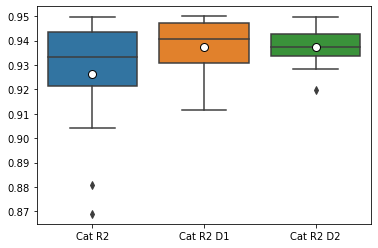

In [36]:
sns.boxplot(data=combo[['Cat R2', 'Cat R2 D1', 'Cat R2 D2']], showmeans=True,
                        meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});